# COGS 118A Final Project

by Jeff Jimenez

In [1]:
# Importing packages to prepare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing and Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Installs xgboost for boosted tree
!pip install xgboost

# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from itertools import product
from sklearn.preprocessing import StandardScaler



# Metrics for Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Cross-Validation
from sklearn.model_selection import cross_val_score, GridSearchCV

# Import dataset from UCI ML database
!pip install ucimlrepo


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Wine Dataset

In [2]:
# Imports wine dataset from UCI ml database
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [3]:
wine_df = pd.DataFrame(X)
wine_df['target'] = y

In [4]:
wine_df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


## Wine Random Forest

In [5]:
# Study parameters
wine_param_grid_rf = {
    'n_estimators': [1024],  # Fixed number of trees
    'max_features': [1, 2, 4, 6, 8, 12, 16, 20]  # Feature set sizes at splits
}

# Mapping multiclass to 2 groups
y_binary = y.squeeze()
y_binary = y_binary.map({1: 1, 2: 1, 3: 0})

wine_rf = RandomForestClassifier(random_state=23)
wine_gridsearch_rf = GridSearchCV(wine_rf, wine_param_grid_rf, cv=5, scoring='accuracy')

splits = [0.2, 0.4, 0.5, 0.6, 0.8]  # 20/80, 40/60, 50/50, 60/40, and 80/20 splits
seeds = [42, 23, 15] # random seeds for each trial, will be manually set


In [6]:
wine_rf_results1 = []
wine_rf_results2 = []
wine_rf_results3 = []

### Trial 1

In [7]:
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=split, random_state=42, stratify=y)

    # Fit GridSearchCV
    wine_gridsearch_rf.fit(X_train, y_train)

    # Print the best parameters
    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", wine_gridsearch_rf.best_params_)

    # Evaluate the best model on the test set
    wine_best_params = wine_gridsearch_rf.best_params_
    wine_best_rf = wine_gridsearch_rf.best_estimator_
    
    train_accuracy = accuracy_score(y_train, wine_best_rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, wine_best_rf.predict(X_test))
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")


    wine_rf_results1.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': wine_best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 1.0000
Best Parameters for 60/40 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 1.0000
Best Parameters for 50/50 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9888
Best Parameters for 40/60 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 0.9907
Best Parameters for 19/80 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accuracy for 19/80 train/test split: 0.9930


In [8]:
wine_rf_results1_df = pd.DataFrame(wine_rf_results1)
wine_rf_results1_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.000000
1,60/40,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.000000
2,50/50,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.988764
3,40/60,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.990654
4,19/80,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.993007


### Trial 2

In [9]:
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=split, random_state=23, stratify=y)

    # Fit GridSearchCV
    wine_gridsearch_rf.fit(X_train, y_train)

    # Print the best parameters
    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", wine_gridsearch_rf.best_params_)

    # Evaluate the best model on the test set
    wine_best_params = wine_gridsearch_rf.best_params_
    wine_best_rf = wine_gridsearch_rf.best_estimator_
    
    train_accuracy = accuracy_score(y_train, wine_best_rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, wine_best_rf.predict(X_test))
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")


    wine_rf_results2.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': wine_best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'max_features': 2, 'n_estimators': 1024}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 1.0000
Best Parameters for 60/40 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 1.0000
Best Parameters for 50/50 train/test split: {'max_features': 2, 'n_estimators': 1024}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9888
Best Parameters for 40/60 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 1.0000
Best Parameters for 19/80 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accuracy for 19/80 train/test split: 0.9720


In [10]:
wine_rf_results2_df = pd.DataFrame(wine_rf_results1)
wine_rf_results2_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.000000
1,60/40,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.000000
2,50/50,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.988764
3,40/60,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.990654
4,19/80,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.993007


### Trial 3

In [11]:
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=split, random_state=15, stratify=y)

    # Fit GridSearchCV
    wine_gridsearch_rf.fit(X_train, y_train)

    # Print the best parameters
    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", wine_gridsearch_rf.best_params_)

    # Evaluate the best model on the test set
    wine_best_params = wine_gridsearch_rf.best_params_
    wine_best_rf = wine_gridsearch_rf.best_estimator_
    
    train_accuracy = accuracy_score(y_train, wine_best_rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, wine_best_rf.predict(X_test))
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")


    wine_rf_results3.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': wine_best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 1.0000
Best Parameters for 60/40 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 1.0000
Best Parameters for 50/50 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9888
Best Parameters for 40/60 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 0.9907
Best Parameters for 19/80 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accuracy for 19/80 train/test split: 0.9860


In [12]:
wine_rf_results3_df = pd.DataFrame(wine_rf_results1)
wine_rf_results3_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.000000
1,60/40,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.000000
2,50/50,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.988764
3,40/60,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.990654
4,19/80,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.993007


### Wine RF Average Train and Test Accuracies for Splits

In [13]:
# Combines all 3 trials into 1 dataframe
wine_rf_combined_results_df = pd.concat(
    [wine_rf_results1_df, wine_rf_results2_df, wine_rf_results3_df], ignore_index=True
)

# Finds the average train and test accuracy
average_wine_rf_results_df = wine_rf_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_wine_rf_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,1.0,0.993007
1,40/60,1.0,0.990654
2,50/50,1.0,0.988764
3,60/40,1.0,1.000000
4,80/20,1.0,1.000000


It seemed that through the 3 trials, the train and test accuracy were the exact same.

## Wine Logistic Regression

In [14]:
# Study parameters
wine_param_grid_lr = {
    'C': [1e-8, 1e-6, 1e-4, 1e-2, 1, 10, 1e2, 1e4],  # Wide range of regularization strengths
    'penalty': ['none', 'l2'],  # Includes unregularized and L2 regularization
    'solver': ['lbfgs'],  # Solver suitable for L2
    'max_iter': [1000]  # Ensure convergence
}

# Initialize Logistic Regression classifier
wine_lr = LogisticRegression(random_state=42)

# Define splits and seeds
splits = [0.2, 0.4, 0.5, 0.6, 0.8]  # 20/80, 40/60, 50/50, 60/40, and 80/20 splits
seeds = [42, 23, 15] # random seeds for each trial, will be manually set

In [15]:
wine_lr_results1 = []
wine_lr_results2 = []
wine_lr_results3 = []

### Trial 1

In [16]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=42, stratify=y_binary
    )

    # Set up GridSearchCV
    wine_gridsearch_lr = GridSearchCV(wine_lr, param_grid=wine_param_grid_lr, cv=5, scoring='accuracy')
    wine_gridsearch_lr.fit(X_train, y_train)

    # Get best model and parameters
    wine_best_lr = wine_gridsearch_lr.best_estimator_
    best_params = wine_gridsearch_lr.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, wine_best_lr.predict(X_train))
    test_accuracy = accuracy_score(y_test, wine_best_lr.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")
    
    # Store results
    wine_lr_results1.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 0.9444
Best Parameters for 60/40 train/test split: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 0.9722
Best Parameters for 50/50 train/test split: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9663
Best Parameters for 40/60 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 0.9813
Best Parameters for 19/80 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 19/80 train/test split: 1.0000
Test 

In [17]:
wine_lr_results1_df = pd.DataFrame(wine_lr_results1)
wine_lr_results1_df


,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",1.0,0.944444
1,60/40,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",1.0,0.972222
2,50/50,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",1.0,0.966292
3,40/60,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",1.0,0.981308
4,19/80,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",1.0,0.979021


### Trial 2

In [18]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=23, stratify=y_binary
    )

    # Set up GridSearchCV
    wine_gridsearch_lr = GridSearchCV(wine_lr, param_grid=wine_param_grid_lr, cv=5, scoring='accuracy')
    wine_gridsearch_lr.fit(X_train, y_train)

    # Get best model and parameters
    wine_best_lr = wine_gridsearch_lr.best_estimator_
    best_params = wine_gridsearch_lr.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, wine_best_lr.predict(X_train))
    test_accuracy = accuracy_score(y_test, wine_best_lr.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")
    
    # Store results
    wine_lr_results2.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 0.9444
Best Parameters for 60/40 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 0.9722
Best Parameters for 50/50 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9663
Best Parameters for 40/60 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 0.9720
Best Parameters for 19/80 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 19/80 train/test split: 1.0000
Test Ac

In [19]:
wine_lr_results2_df = pd.DataFrame(wine_lr_results2)
wine_lr_results2_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",1.0,0.944444
1,60/40,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",1.0,0.972222
2,50/50,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",1.0,0.966292
3,40/60,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",1.0,0.971963
4,19/80,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",1.0,0.965035


### Trial 3

In [20]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=15, stratify=y_binary
    )

    # Set up GridSearchCV
    wine_gridsearch_lr = GridSearchCV(wine_lr, param_grid=wine_param_grid_lr, cv=5, scoring='accuracy')
    wine_gridsearch_lr.fit(X_train, y_train)

    # Get best model and parameters
    wine_best_lr = wine_gridsearch_lr.best_estimator_
    best_params = wine_gridsearch_lr.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, wine_best_lr.predict(X_train))
    test_accuracy = accuracy_score(y_test, wine_best_lr.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")
    
    # Store results
    wine_lr_results3.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 0.9444
Best Parameters for 60/40 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 0.9583
Best Parameters for 50/50 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9663
Best Parameters for 40/60 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 0.9533
Best Parameters for 19/80 train/test split: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accur

In [21]:
wine_lr_results3_df = pd.DataFrame(wine_lr_results3)
wine_lr_results3_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",1.0,0.944444
1,60/40,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",1.0,0.958333
2,50/50,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",1.0,0.966292
3,40/60,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",1.0,0.953271
4,19/80,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",1.0,0.930070


### Wine LR Average Train and Test Accuracies for Splits

In [22]:
# Combine all Logistic Regression results into one DataFrame
wine_lr_combined_results_df = pd.concat(
    [wine_lr_results1_df, wine_lr_results2_df, wine_lr_results3_df], ignore_index=True
)

# Find the average train and test accuracy
average_wine_lr_results_df = wine_lr_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_wine_lr_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,1.0,0.958042
1,40/60,1.0,0.968847
2,50/50,1.0,0.966292
3,60/40,1.0,0.967593
4,80/20,1.0,0.944444


## Wine SVM 

In [23]:
# Study parameters
wine_param_grid_svm = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 
    'kernel': ['linear', 'poly', 'rbf'],  
    'degree': [2, 3],  
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2],  
    'coef0': [0],  
    'max_iter': [100000]  
}

wine_svm = SVC(random_state=42)

# Define splits and seeds
splits = [0.2, 0.4, 0.5, 0.6, 0.8]  # 20/80, 40/60, 50/50, 60/40, and 80/20 splits
seeds = [42, 23, 15] # random seeds for each trial, will be manually set

In [24]:
wine_svm_results1 = []
wine_svm_results2 = []
wine_svm_results3 = []

### Trial 1

In [25]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=42, stratify=y_binary
    )

    # Set up GridSearchCV
    wine_gridsearch_svm = GridSearchCV(wine_svm, param_grid=wine_param_grid_svm, cv=5, scoring='accuracy')
    wine_gridsearch_svm.fit(X_train, y_train)

    # Get best model and parameters
    wine_best_svm = wine_gridsearch_svm.best_estimator_
    best_params = wine_gridsearch_svm.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, wine_best_svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, wine_best_svm.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    wine_svm_results1.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 0.9722
Best Parameters for 60/40 train/test split: {'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 0.9722
Best Parameters for 50/50 train/test split: {'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma': 1, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9775
Best Parameters for 40/60 train/test split: {'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 40/60 train/test split: 0.9859
Test Accuracy for 40/60 train/test split: 0.9813
Best Parameters for 19/80 train/test split: {'C': 1e-07, 'coef0': 0, 'de

In [26]:
wine_svm_results1_df = pd.DataFrame(wine_svm_results1)
wine_svm_results1_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",1.000000,0.972222
1,60/40,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",1.000000,0.972222
2,50/50,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",1.000000,0.977528
3,40/60,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",0.985915,0.981308
4,19/80,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",1.000000,0.979021


### Trial 2

In [27]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=23, stratify=y_binary
    )

    # Set up GridSearchCV
    wine_gridsearch_svm = GridSearchCV(wine_svm, param_grid=wine_param_grid_svm, cv=5, scoring='accuracy')
    wine_gridsearch_svm.fit(X_train, y_train)

    # Get best model and parameters
    wine_best_svm = wine_gridsearch_svm.best_estimator_
    best_params = wine_gridsearch_svm.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, wine_best_svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, wine_best_svm.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    wine_svm_results2.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 80/20 train/test split: 0.9859
Test Accuracy for 80/20 train/test split: 0.9722
Best Parameters for 60/40 train/test split: {'C': 1e-07, 'coef0': 0, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 0.9722
Best Parameters for 50/50 train/test split: {'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9775
Best Parameters for 40/60 train/test split: {'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma': 1, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 0.9720
Best Parameters for 19/80 train/test split: {'C': 1e-07, 'coef0': 0, 

In [28]:
wine_svm_results2_df = pd.DataFrame(wine_svm_results2)
wine_svm_results2_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",0.985915,0.972222
1,60/40,"{'C': 1e-07, 'coef0': 0, 'degree': 3, 'gamma':...",1.000000,0.972222
2,50/50,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",1.000000,0.977528
3,40/60,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",1.000000,0.971963
4,19/80,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",1.000000,0.965035


### Test 3

In [29]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=15, stratify=y_binary
    )

    # Set up GridSearchCV
    wine_gridsearch_svm = GridSearchCV(wine_svm, param_grid=wine_param_grid_svm, cv=5, scoring='accuracy')
    wine_gridsearch_svm.fit(X_train, y_train)

    # Get best model and parameters
    wine_best_svm = wine_gridsearch_svm.best_estimator_
    best_params = wine_gridsearch_svm.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, wine_best_svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, wine_best_svm.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    wine_svm_results3.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 80/20 train/test split: 0.9930
Test Accuracy for 80/20 train/test split: 0.9167
Best Parameters for 60/40 train/test split: {'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 0.9722
Best Parameters for 50/50 train/test split: {'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma': 0.5, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9775
Best Parameters for 40/60 train/test split: {'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma': 1, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 0.9813
Best Parameters for 19/80 train/test split: {'C': 0.1, 'coef0': 0, 'degr

In [30]:
wine_svm_results3_df = pd.DataFrame(wine_svm_results2)
wine_svm_results3_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",0.985915,0.972222
1,60/40,"{'C': 1e-07, 'coef0': 0, 'degree': 3, 'gamma':...",1.000000,0.972222
2,50/50,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",1.000000,0.977528
3,40/60,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",1.000000,0.971963
4,19/80,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",1.000000,0.965035


### Wine SVM Average Train and Test Accuracies for Splits

In [31]:
wine_svm_combined_results_df = pd.concat(
    [wine_svm_results1_df, wine_svm_results2_df, wine_svm_results3_df], ignore_index=True
)

# Find the average train and test accuracy
average_wine_svm_results_df = wine_svm_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()
average_wine_svm_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,1.000000,0.969697
1,40/60,0.995305,0.975078
2,50/50,1.000000,0.977528
3,60/40,1.000000,0.972222
4,80/20,0.990610,0.972222


## Wine Boosted Trees

In [32]:
# Study parameters
wine_param_grid_xgb = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

# Define splits and seeds
splits = [0.2, 0.4, 0.5, 0.6, 0.8]  # 20/80, 40/60, 50/50, 60/40, and 80/20 splits
seeds = [42, 23, 15] # random seeds for each trial, will be manually set

In [33]:
wine_xgb_results1 = []
wine_xgb_results2 = []
wine_xgb_results3 = []

### Trial 1

In [34]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=42, stratify=y_binary
    )

    for n_estimators in wine_param_grid_xgb:
        # Initialize XGBoost model with only n_estimators varying
        wine_bt = XGBClassifier(
            n_estimators=n_estimators,  # From Caruana's settings
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )

        # Train the model
        wine_bt.fit(X_train, y_train)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, wine_bt.predict(X_train))
        test_accuracy = accuracy_score(y_test, wine_bt.predict(X_test))

        # Store results
        wine_xgb_results1.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'n_estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })

In [35]:
wine_xgb_results1_df = pd.DataFrame(wine_xgb_results1)
wine_xgb_results1_df

,Split (Train/Test),n_estimators,Train Accuracy,Test Accuracy
0,80/20,2,0.971831,0.916667
1,80/20,4,1.000000,0.972222
2,80/20,8,1.000000,0.972222
3,80/20,16,1.000000,0.972222
4,80/20,32,1.000000,0.972222
5,80/20,64,1.000000,0.972222
6,80/20,128,1.000000,0.972222
7,80/20,256,1.000000,0.972222
8,80/20,512,1.000000,0.972222
9,80/20,1024,1.000000,0.972222


### Trial 2

In [36]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=23, stratify=y_binary
    )

    for n_estimators in wine_param_grid_xgb:
        # Initialize XGBoost model with only n_estimators varying
        wine_bt = XGBClassifier(
            n_estimators=n_estimators,  # From Caruana's settings
            random_state=23,
            use_label_encoder=False,
            eval_metric='logloss'
        )

        # Train the model
        wine_bt.fit(X_train, y_train)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, wine_bt.predict(X_train))
        test_accuracy = accuracy_score(y_test, wine_bt.predict(X_test))

        # Store results
        wine_xgb_results2.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'n_estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })

In [37]:
wine_xgb_results2_df = pd.DataFrame(wine_xgb_results2)
wine_xgb_results2_df

,Split (Train/Test),n_estimators,Train Accuracy,Test Accuracy
0,80/20,2,0.978873,0.888889
1,80/20,4,0.992958,0.888889
2,80/20,8,1.000000,0.944444
3,80/20,16,1.000000,0.944444
4,80/20,32,1.000000,0.916667
5,80/20,64,1.000000,0.916667
6,80/20,128,1.000000,0.916667
7,80/20,256,1.000000,0.916667
8,80/20,512,1.000000,0.916667
9,80/20,1024,1.000000,0.916667


### Trial 3

In [38]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=15, stratify=y_binary
    )

    for n_estimators in wine_param_grid_xgb:
        # Initialize XGBoost model with only n_estimators varying
        wine_bt = XGBClassifier(
            n_estimators=n_estimators,  # From Caruana's settings
            random_state=15,
            use_label_encoder=False,
            eval_metric='logloss'
        )

        # Train the model
        wine_bt.fit(X_train, y_train)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, wine_bt.predict(X_train))
        test_accuracy = accuracy_score(y_test, wine_bt.predict(X_test))

        # Store results
        wine_xgb_results3.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'n_estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })

In [39]:
wine_xgb_results3_df = pd.DataFrame(wine_xgb_results3)
wine_xgb_results3_df

,Split (Train/Test),n_estimators,Train Accuracy,Test Accuracy
0,80/20,2,0.950704,0.833333
1,80/20,4,1.000000,0.944444
2,80/20,8,1.000000,0.972222
3,80/20,16,1.000000,0.972222
4,80/20,32,1.000000,0.972222
5,80/20,64,1.000000,0.972222
6,80/20,128,1.000000,0.972222
7,80/20,256,1.000000,0.972222
8,80/20,512,1.000000,0.972222
9,80/20,1024,1.000000,0.972222


### Wine Boosted Trees Average Train and Test Accuracies for Splits

In [40]:
wine_xgb_combined_results_df = pd.concat(
    [wine_xgb_results1_df, wine_xgb_results2_df, wine_xgb_results3_df], ignore_index=True
)

average_wine_xgb_results_df = wine_xgb_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_wine_xgb_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,0.998268,0.937487
1,40/60,0.996586,0.940527
2,50/50,0.995914,0.943480
3,60/40,0.996284,0.947391
4,80/20,0.996799,0.946970


## Wine K-Nearest Neighbor

In [41]:
def get_k_values(max_k=26, train_size=None):
    if train_size:
        return np.linspace(1, train_size, num=min(26, train_size), dtype=int)
    return list(range(1, max_k + 1))

splits = [0.2, 0.4, 0.5, 0.6, 0.8]  # 20/80, 40/60, 50/50, 60/40, and 80/20 splits

In [42]:
wine_knn_results1 = []
wine_knn_results2 = []
wine_knn_results3 = []

### Trial 1

In [43]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=42, stratify=y_binary
    )
    
    # gets values of K based on training sets
    k_values = get_k_values(train_size=len(X_train))
    
    # iterate through K values
    for k in k_values:
        # Euclidean distance, uniform weights
        knn_uniform = KNeighborsClassifier(
            n_neighbors=k, weights='uniform', metric='euclidean'
        )
        knn_uniform.fit(X_train, y_train)
        train_accuracy_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
        test_accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

        # distance-weighted KNN (gain ratio approximation)
        knn_distance = KNeighborsClassifier(
            n_neighbors=k, weights='distance', metric='euclidean'
        )
        knn_distance.fit(X_train, y_train)
        train_accuracy_distance = accuracy_score(y_train, knn_distance.predict(X_train))
        test_accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

        # Store results for uniform weights
        wine_knn_results1.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Uniform',
            'Train Accuracy': train_accuracy_uniform,
            'Test Accuracy': test_accuracy_uniform
        })

        # Store results for distance weights
        wine_knn_results1.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Distance',
            'Train Accuracy': train_accuracy_distance,
            'Test Accuracy': test_accuracy_distance
        })

In [44]:
wine_knn_results1_df = pd.DataFrame(wine_knn_results1)
wine_knn_results1_df

,Split (Train/Test),K,Weights,Train Accuracy,Test Accuracy
0,80/20,1,Uniform,1.000000,0.777778
1,80/20,1,Distance,1.000000,0.777778
2,80/20,6,Uniform,0.816901,0.750000
3,80/20,6,Distance,1.000000,0.750000
4,80/20,12,Uniform,0.767606,0.750000
...,...,...,...,...,...
255,19/80,32,Distance,1.000000,0.706294
256,19/80,33,Uniform,0.742857,0.727273
257,19/80,33,Distance,1.000000,0.706294
258,19/80,35,Uniform,0.742857,0.727273


### Trial 2

In [45]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=23, stratify=y_binary
    )
    
    # gets values of K based on training sets
    k_values = get_k_values(train_size=len(X_train))
    
    # iterate through K values
    for k in k_values:
        # Euclidean distance, uniform weights
        knn_uniform = KNeighborsClassifier(
            n_neighbors=k, weights='uniform', metric='euclidean'
        )
        knn_uniform.fit(X_train, y_train)
        train_accuracy_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
        test_accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

        # distance-weighted KNN (gain ratio approximation)
        knn_distance = KNeighborsClassifier(
            n_neighbors=k, weights='distance', metric='euclidean'
        )
        knn_distance.fit(X_train, y_train)
        train_accuracy_distance = accuracy_score(y_train, knn_distance.predict(X_train))
        test_accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

        # Store results for uniform weights
        wine_knn_results2.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Uniform',
            'Train Accuracy': train_accuracy_uniform,
            'Test Accuracy': test_accuracy_uniform
        })

        # Store results for distance weights
        wine_knn_results2.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Distance',
            'Train Accuracy': train_accuracy_distance,
            'Test Accuracy': test_accuracy_distance
        })

In [46]:
wine_knn_results2_df = pd.DataFrame(wine_knn_results2)
wine_knn_results2_df

,Split (Train/Test),K,Weights,Train Accuracy,Test Accuracy
0,80/20,1,Uniform,1.000000,0.805556
1,80/20,1,Distance,1.000000,0.805556
2,80/20,6,Uniform,0.845070,0.750000
3,80/20,6,Distance,1.000000,0.750000
4,80/20,12,Uniform,0.802817,0.638889
...,...,...,...,...,...
255,19/80,32,Distance,1.000000,0.741259
256,19/80,33,Uniform,0.742857,0.727273
257,19/80,33,Distance,1.000000,0.741259
258,19/80,35,Uniform,0.742857,0.727273


### Trial 3

In [47]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=15, stratify=y_binary
    )
    
    # gets values of K based on training sets
    k_values = get_k_values(train_size=len(X_train))
    
    # iterate through K values
    for k in k_values:
        # Euclidean distance, uniform weights
        knn_uniform = KNeighborsClassifier(
            n_neighbors=k, weights='uniform', metric='euclidean'
        )
        knn_uniform.fit(X_train, y_train)
        train_accuracy_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
        test_accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

        # distance-weighted KNN (gain ratio approximation)
        knn_distance = KNeighborsClassifier(
            n_neighbors=k, weights='distance', metric='euclidean'
        )
        knn_distance.fit(X_train, y_train)
        train_accuracy_distance = accuracy_score(y_train, knn_distance.predict(X_train))
        test_accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

        # Store results for uniform weights
        wine_knn_results3.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Uniform',
            'Train Accuracy': train_accuracy_uniform,
            'Test Accuracy': test_accuracy_uniform
        })

        # Store results for distance weights
        wine_knn_results3.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Distance',
            'Train Accuracy': train_accuracy_distance,
            'Test Accuracy': test_accuracy_distance
        })

In [48]:
wine_knn_results3_df = pd.DataFrame(wine_knn_results3)
wine_knn_results3_df

,Split (Train/Test),K,Weights,Train Accuracy,Test Accuracy
0,80/20,1,Uniform,1.000000,0.694444
1,80/20,1,Distance,1.000000,0.694444
2,80/20,6,Uniform,0.852113,0.611111
3,80/20,6,Distance,1.000000,0.666667
4,80/20,12,Uniform,0.816901,0.611111
...,...,...,...,...,...
255,19/80,32,Distance,1.000000,0.692308
256,19/80,33,Uniform,0.742857,0.727273
257,19/80,33,Distance,1.000000,0.692308
258,19/80,35,Uniform,0.742857,0.727273


### Wine KNN Average Train and Test Accuracies for Splits

In [49]:
wine_knn_combined_results_df = pd.concat(
    [wine_knn_results1_df, wine_knn_results2_df, wine_knn_results3_df], ignore_index=True
)

average_wine_knn_results_df = wine_knn_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_wine_knn_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,0.898352,0.720549
1,40/60,0.883442,0.740834
2,50/50,0.882527,0.732066
3,60/40,0.880201,0.735399
4,80/20,0.883667,0.710470


## Comparison of Classifiers on Wine Dataset

### Heatmap

In [50]:
wine_classifiers_train_test_df = pd.DataFrame({
    'Split (Train/Test)': average_wine_xgb_results_df['Split (Train/Test)'],
    'XGBoost Train': average_wine_xgb_results_df['Train Accuracy'],
    'XGBoost Test': average_wine_xgb_results_df['Test Accuracy'],
    'KNN Train': average_wine_knn_results_df['Train Accuracy'],
    'KNN Test': average_wine_knn_results_df['Test Accuracy'],
    'Random Forest Train': average_wine_rf_results_df['Train Accuracy'],
    'Random Forest Test': average_wine_rf_results_df['Test Accuracy'],
    'Logistic Regression Train': average_wine_lr_results_df['Train Accuracy'],
    'Logistic Regression Test': average_wine_lr_results_df['Test Accuracy'],
    'SVM Train': average_wine_svm_results_df['Train Accuracy'],
    'SVM Test': average_wine_svm_results_df['Test Accuracy']
})
wine_classifiers_train_test_df

,Split (Train/Test),XGBoost Train,XGBoost Test,KNN Train,KNN Test,Random Forest Train,Random Forest Test,Logistic Regression Train,Logistic Regression Test,SVM Train,SVM Test
0,19/80,0.998268,0.937487,0.898352,0.720549,1.0,0.993007,1.0,0.958042,1.000000,0.969697
1,40/60,0.996586,0.940527,0.883442,0.740834,1.0,0.990654,1.0,0.968847,0.995305,0.975078
2,50/50,0.995914,0.943480,0.882527,0.732066,1.0,0.988764,1.0,0.966292,1.000000,0.977528
3,60/40,0.996284,0.947391,0.880201,0.735399,1.0,1.000000,1.0,0.967593,1.000000,0.972222
4,80/20,0.996799,0.946970,0.883667,0.710470,1.0,1.000000,1.0,0.944444,0.990610,0.972222


In [51]:
wine_classifiers_train_test_df.set_index('Split (Train/Test)', inplace=True)
wine_classifiers_train_test_df

,XGBoost Train,XGBoost Test,KNN Train,KNN Test,Random Forest Train,Random Forest Test,Logistic Regression Train,Logistic Regression Test,SVM Train,SVM Test
Split (Train/Test),,,,,,,,,,
19/80,0.998268,0.937487,0.898352,0.720549,1.0,0.993007,1.0,0.958042,1.000000,0.969697
40/60,0.996586,0.940527,0.883442,0.740834,1.0,0.990654,1.0,0.968847,0.995305,0.975078
50/50,0.995914,0.943480,0.882527,0.732066,1.0,0.988764,1.0,0.966292,1.000000,0.977528
60/40,0.996284,0.947391,0.880201,0.735399,1.0,1.000000,1.0,0.967593,1.000000,0.972222
80/20,0.996799,0.946970,0.883667,0.710470,1.0,1.000000,1.0,0.944444,0.990610,0.972222


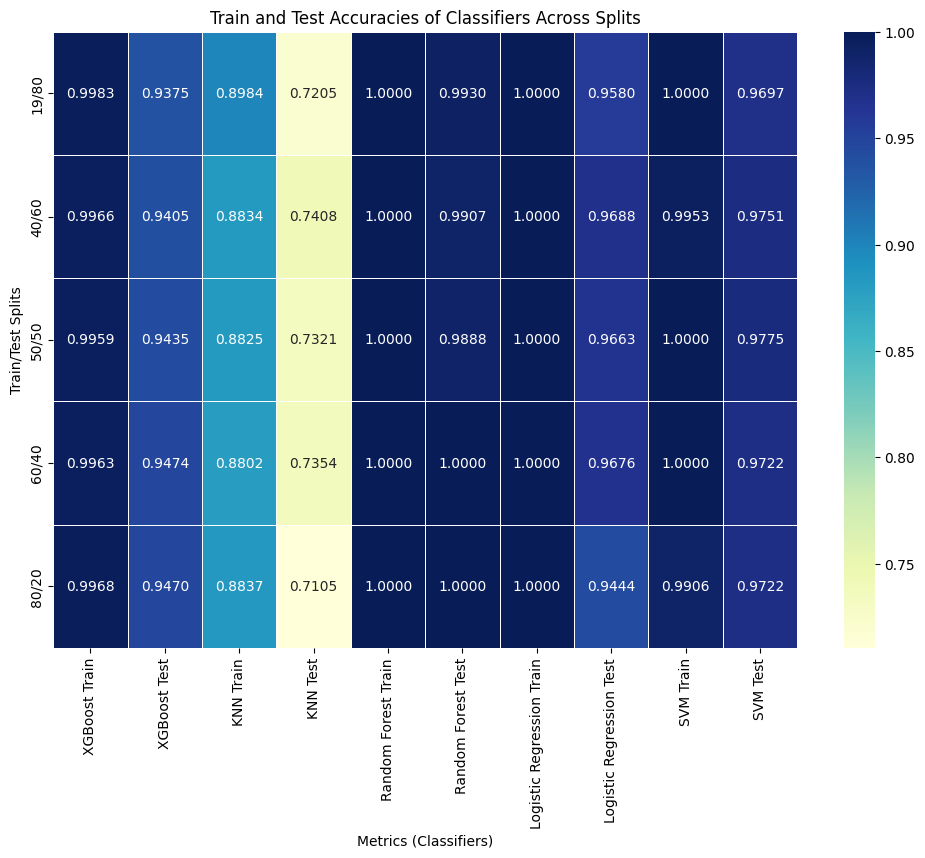

In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(wine_classifiers_train_test_df, annot=True, cmap='YlGnBu', fmt=".4f", linewidths=0.5)
plt.title('Train and Test Accuracies of Classifiers Across Splits')
plt.xlabel('Metrics (Classifiers)')
plt.ylabel('Train/Test Splits')
plt.show()

### Accuracy Curve

In [54]:
splits = [int(split.split('/')[1]) for split in wine_classifiers_train_test_df.index]
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

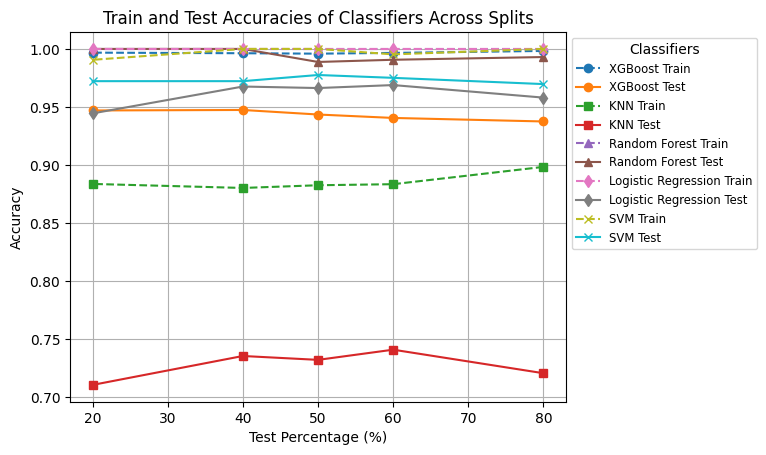

In [55]:
# Plot XGBoost accuracies
plt.plot(splits, wine_classifiers_train_test_df['XGBoost Train'], label='XGBoost Train', marker='o', linestyle='--')
plt.plot(splits, wine_classifiers_train_test_df['XGBoost Test'], label='XGBoost Test', marker='o')

# Plot KNN accuracies
plt.plot(splits, wine_classifiers_train_test_df['KNN Train'], label='KNN Train', marker='s', linestyle='--')
plt.plot(splits, wine_classifiers_train_test_df['KNN Test'], label='KNN Test', marker='s')

# Plot Random Forest accuracies
plt.plot(splits, wine_classifiers_train_test_df['Random Forest Train'], label='Random Forest Train', marker='^', linestyle='--')
plt.plot(splits, wine_classifiers_train_test_df['Random Forest Test'], label='Random Forest Test', marker='^')

# Plot Logistic Regression accuracies
plt.plot(splits, wine_classifiers_train_test_df['Logistic Regression Train'], label='Logistic Regression Train', marker='d', linestyle='--')
plt.plot(splits, wine_classifiers_train_test_df['Logistic Regression Test'], label='Logistic Regression Test', marker='d')

# Plot SVM accuracies
plt.plot(splits, wine_classifiers_train_test_df['SVM Train'], label='SVM Train', marker='x', linestyle='--')
plt.plot(splits, wine_classifiers_train_test_df['SVM Test'], label='SVM Test', marker='x')

# Add labels, title, legend, and grid
plt.title('Train and Test Accuracies of Classifiers Across Splits')
plt.xlabel('Test Percentage (%)')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', title="Classifiers")
plt.grid()
plt.show()

## Forest Fires Dataset

In [56]:
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 
  
# metadata 
print(forest_fires.metadata) 
  
# variable information 
print(forest_fires.variables) 


{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'ID': 368, 'type': 'NATIVE', 'title': 'A data mining approach to predict forest fires using meteorological da

In [57]:
fire_df = pd.DataFrame(X)
fire_df['target'] = y
fire_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,target
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Cleaning Data

In [58]:
fire_df = fire_df.drop(columns=['month', 'day'])
categorical_columns = fire_df.select_dtypes(include=['object']).columns

# 1-hot encodes categorical features
if len(categorical_columns) > 0:
    fire_df = pd.get_dummies(fire_df, columns=categorical_columns, drop_first=True)

X = fire_df.drop(columns=fire_df.columns[-1]) 
y = fire_df[fire_df.columns[-1]]

# Moves target to end
#target_column = 'target'  
#columns = [col for col in fire_df.columns if col != target_column]  # Exclude target column
#columns.append(target_column) 
#fire_df = fire_df[columns]

# makes binary classes, if 0, no fire, bigger than 1 = fire
fire_df['binary_target'] = fire_df['target'].apply(lambda x: 1 if x > 0 else 0)
class_distribution = fire_df['binary_target'].value_counts()
fire_df = fire_df.drop(columns=['target'])

X = fire_df.drop(columns=['binary_target'])
y_binary = fire_df['binary_target']

In [59]:
fire_df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,binary_target
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0


In [60]:
fire_param_grid_rf = {
    'n_estimators': [1024],  # Fixed number of trees
    'max_features': [1, 2, 4, 6, 8, 12, 16, 20]  # Feature set sizes at splits
}

# Initialize Random Forest and GridSearchCV
fire_rf = RandomForestClassifier(random_state=23)
fire_gridsearch_rf = GridSearchCV(fire_rf, fire_param_grid_rf, cv=5, scoring='accuracy')

# Splits for train-test (20/80, 40/60, 50/50, etc.)
splits = [0.2, 0.4, 0.5, 0.6, 0.8]

In [61]:
fire_rf_results1 = []
fire_rf_results2 = []
fire_rf_results3 = []

### Trial 1 

In [62]:
for split in splits:
    # Perform train-test split, no stratification because there are a lot of classes 
    # with only 1 sample
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=split, random_state=42, stratify=y_binary)

    # Fit GridSearchCV
    fire_gridsearch_rf.fit(X_train, y_train)

    # Get the best parameters and model
    fire_best_params = fire_gridsearch_rf.best_params_
    fire_best_rf = fire_gridsearch_rf.best_estimator_

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, fire_best_rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, fire_best_rf.predict(X_test))

    # Print results
    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", fire_best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results in a list
    fire_rf_results1.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': fire_best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Best Parameters for 80/20 train/test split: {'max_features': 2, 'n_estimators': 1024}
Train Accuracy for 80/20 train/test split: 0.9903
Test Accuracy for 80/20 train/test split: 0.6731
Best Parameters for 60/40 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 60/40 train/test split: 0.9968
Test Accuracy for 60/40 train/test split: 0.6280
Best Parameters for 50/50 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 50/50 train/test split: 0.9961
Test Accuracy for 50/50 train/test split: 0.6255
Best Parameters for 40/60 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 40/60 train/test split: 0.9951
Test Accuracy for 40/60 train/test split: 0.5595
Best Parameters for 19/80 train/test split: {'max_features': 8, 'n_estimators': 1024}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accuracy for 19/80 train/test split: 0.4734


In [63]:
fire_rf_results1_df = pd.DataFrame(fire_rf_results1)
fire_rf_results1_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'max_features': 2, 'n_estimators': 1024}",0.990315,0.673077
1,60/40,"{'max_features': 1, 'n_estimators': 1024}",0.996774,0.628019
2,50/50,"{'max_features': 1, 'n_estimators': 1024}",0.996124,0.625483
3,40/60,"{'max_features': 1, 'n_estimators': 1024}",0.995146,0.559486
4,19/80,"{'max_features': 8, 'n_estimators': 1024}",1.000000,0.473430


### Trial 2

In [64]:
for split in splits:
    # Perform train-test split, no stratification because there are a lot of classes 
    # with only 1 sample
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=split, random_state=23)

    # Fit GridSearchCV
    fire_gridsearch_rf.fit(X_train, y_train)

    # Get the best parameters and model
    fire_best_params = fire_gridsearch_rf.best_params_
    fire_best_rf = fire_gridsearch_rf.best_estimator_

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, fire_best_rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, fire_best_rf.predict(X_test))

    # Print results
    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", fire_best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results in a list
    fire_rf_results2.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': fire_best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Best Parameters for 80/20 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 80/20 train/test split: 0.9952
Test Accuracy for 80/20 train/test split: 0.5577
Best Parameters for 60/40 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 60/40 train/test split: 0.9968
Test Accuracy for 60/40 train/test split: 0.5121
Best Parameters for 50/50 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 50/50 train/test split: 0.9961
Test Accuracy for 50/50 train/test split: 0.5367
Best Parameters for 40/60 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 40/60 train/test split: 0.9951
Test Accuracy for 40/60 train/test split: 0.5498
Best Parameters for 19/80 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 19/80 train/test split: 0.9903
Test Accuracy for 19/80 train/test split: 0.5072


In [65]:
fire_rf_results2_df = pd.DataFrame(fire_rf_results2)
fire_rf_results2_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'max_features': 1, 'n_estimators': 1024}",0.995157,0.557692
1,60/40,"{'max_features': 1, 'n_estimators': 1024}",0.996774,0.512077
2,50/50,"{'max_features': 1, 'n_estimators': 1024}",0.996124,0.536680
3,40/60,"{'max_features': 1, 'n_estimators': 1024}",0.995146,0.549839
4,19/80,"{'max_features': 1, 'n_estimators': 1024}",0.990291,0.507246


### Trial 3

In [66]:
for split in splits:
    # Perform train-test split, no stratification because there are a lot of classes 
    # with only 1 sample
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=split, random_state=15)

    # Fit GridSearchCV
    fire_gridsearch_rf.fit(X_train, y_train)

    # Get the best parameters and model
    fire_best_params = fire_gridsearch_rf.best_params_
    fire_best_rf = fire_gridsearch_rf.best_estimator_

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, fire_best_rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, fire_best_rf.predict(X_test))

    # Print results
    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", fire_best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results in a list
    fire_rf_results3.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': fire_best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Best Parameters for 80/20 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 80/20 train/test split: 0.9927
Test Accuracy for 80/20 train/test split: 0.5288
Best Parameters for 60/40 train/test split: {'max_features': 6, 'n_estimators': 1024}
Train Accuracy for 60/40 train/test split: 0.9935
Test Accuracy for 60/40 train/test split: 0.5556
Best Parameters for 50/50 train/test split: {'max_features': 12, 'n_estimators': 1024}
Train Accuracy for 50/50 train/test split: 0.9922
Test Accuracy for 50/50 train/test split: 0.5985
Best Parameters for 40/60 train/test split: {'max_features': 2, 'n_estimators': 1024}
Train Accuracy for 40/60 train/test split: 0.9951
Test Accuracy for 40/60 train/test split: 0.5113
Best Parameters for 19/80 train/test split: {'max_features': 8, 'n_estimators': 1024}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accuracy for 19/80 train/test split: 0.5435


In [67]:
fire_rf_results3_df = pd.DataFrame(fire_rf_results3)
fire_rf_results3_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'max_features': 1, 'n_estimators': 1024}",0.992736,0.528846
1,60/40,"{'max_features': 6, 'n_estimators': 1024}",0.993548,0.555556
2,50/50,"{'max_features': 12, 'n_estimators': 1024}",0.992248,0.598456
3,40/60,"{'max_features': 2, 'n_estimators': 1024}",0.995146,0.511254
4,19/80,"{'max_features': 8, 'n_estimators': 1024}",1.000000,0.543478


### Forest Fires Random Forest Average Train and Test Accuracies for Splits

In [68]:
fire_rf_combined_results_df = pd.concat(
    [fire_rf_results1_df, fire_rf_results2_df, fire_rf_results3_df], ignore_index=True
)

average_fire_rf_results_df = fire_rf_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_fire_rf_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,0.996764,0.508052
1,40/60,0.995146,0.540193
2,50/50,0.994832,0.586873
3,60/40,0.995699,0.565217
4,80/20,0.992736,0.586538


## Forest Fires Logistic Regression

In [69]:
fire_param_grid_lr = {
    'C': [1e-8, 1e-6, 1e-4, 1e-2, 1, 10, 1e2, 1e4],  # Wide range of regularization strengths
    'penalty': ['none', 'l2'],  # Includes unregularized and L2 regularization
    'solver': ['lbfgs'],  # Solver suitable for L2
    'max_iter': [1000]  # Ensure convergence
}

# Initialize Logistic Regression classifier
fire_lr = LogisticRegression(random_state=42)

# Define splits and seeds
splits = [0.2, 0.4, 0.5, 0.6, 0.8]  # 20/80, 40/60, 50/50, 60/40, and 80/20 splits


In [70]:
fire_lr_results1 = []
fire_lr_results2 = []
fire_lr_results3 = []

### Trial 1

In [71]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=42, stratify=y_binary
    )

    # Set up GridSearchCV
    fire_gridsearch_lr = GridSearchCV(fire_lr, param_grid=fire_param_grid_lr, cv=5, scoring='accuracy')
    fire_gridsearch_lr.fit(X_train, y_train)

    # Get best model and parameters
    fire_best_lr = fire_gridsearch_lr.best_estimator_
    best_params = fire_gridsearch_lr.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, fire_best_lr.predict(X_train))
    test_accuracy = accuracy_score(y_test, fire_best_lr.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")
    
    # Store results
    fire_lr_results1.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 80/20 train/test split: 0.5472
Test Accuracy for 80/20 train/test split: 0.5288
Best Parameters for 60/40 train/test split: {'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 60/40 train/test split: 0.5484
Test Accuracy for 60/40 train/test split: 0.5845
Best Parameters for 50/50 train/test split: {'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 50/50 train/test split: 0.5465
Test Accuracy for 50/50 train/test split: 0.5444
Best Parameters for 40/60 train/test split: {'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 40/60 train/test split: 0.5340
Test Accuracy for 40/60 train/test split: 0.5402
Best Parameters for 19/80 train/test split: {'C': 1e-08, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 19/80 train/test split: 0.524

In [73]:
fire_lr_results1_df = pd.DataFrame(fire_lr_results1)
fire_lr_results1_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 0.0001, 'max_iter': 1000, 'penalty': 'l2...",0.547215,0.528846
1,60/40,"{'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2'...",0.548387,0.584541
2,50/50,"{'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2'...",0.546512,0.544402
3,40/60,"{'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2'...",0.533981,0.540193
4,19/80,"{'C': 1e-08, 'max_iter': 1000, 'penalty': 'l2'...",0.524272,0.521739


### Trial 2

In [74]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=23, stratify=y_binary
    )

    # Set up GridSearchCV
    fire_gridsearch_lr = GridSearchCV(fire_lr, param_grid=fire_param_grid_lr, cv=5, scoring='accuracy')
    fire_gridsearch_lr.fit(X_train, y_train)

    # Get best model and parameters
    fire_best_lr = fire_gridsearch_lr.best_estimator_
    best_params = fire_gridsearch_lr.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, fire_best_lr.predict(X_train))
    test_accuracy = accuracy_score(y_test, fire_best_lr.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")
    
    # Store results
    fire_lr_results2.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 80/20 train/test split: 0.5448
Test Accuracy for 80/20 train/test split: 0.5481
Best Parameters for 60/40 train/test split: {'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 60/40 train/test split: 0.5516
Test Accuracy for 60/40 train/test split: 0.5169
Best Parameters for 50/50 train/test split: {'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 50/50 train/test split: 0.5698
Test Accuracy for 50/50 train/test split: 0.5097
Best Parameters for 40/60 train/test split: {'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 40/60 train/test split: 0.5777
Test Accuracy for 40/60 train/test split: 0.5113
Best Parameters for 19/80 train/test split: {'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 19/80 train/test split: 0.6311

In [75]:
fire_lr_results2_df = pd.DataFrame(fire_lr_results2)
fire_lr_results2_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2'...",0.544794,0.548077
1,60/40,"{'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2'...",0.551613,0.516908
2,50/50,"{'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2'...",0.569767,0.509653
3,40/60,"{'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2'...",0.577670,0.511254
4,19/80,"{'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2'...",0.631068,0.516908


### Trial 3

In [76]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=15, stratify=y_binary
    )

    # Set up GridSearchCV
    fire_gridsearch_lr = GridSearchCV(fire_lr, param_grid=fire_param_grid_lr, cv=5, scoring='accuracy')
    fire_gridsearch_lr.fit(X_train, y_train)

    # Get best model and parameters
    fire_best_lr = fire_gridsearch_lr.best_estimator_
    best_params = fire_gridsearch_lr.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, fire_best_lr.predict(X_train))
    test_accuracy = accuracy_score(y_test, fire_best_lr.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")
    
    # Store results
    fire_lr_results3.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 10000.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 80/20 train/test split: 0.5763
Test Accuracy for 80/20 train/test split: 0.5577
Best Parameters for 60/40 train/test split: {'C': 1e-08, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 60/40 train/test split: 0.5226
Test Accuracy for 60/40 train/test split: 0.5217
Best Parameters for 50/50 train/test split: {'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 50/50 train/test split: 0.5426
Test Accuracy for 50/50 train/test split: 0.5792
Best Parameters for 40/60 train/test split: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 40/60 train/test split: 0.5777
Test Accuracy for 40/60 train/test split: 0.5273
Best Parameters for 19/80 train/test split: {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 19/80 train/test split: 0.60

In [77]:
fire_lr_results3_df = pd.DataFrame(fire_lr_results3)
fire_lr_results3_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 10000.0, 'max_iter': 1000, 'penalty': 'l...",0.576271,0.557692
1,60/40,"{'C': 1e-08, 'max_iter': 1000, 'penalty': 'l2'...",0.522581,0.521739
2,50/50,"{'C': 1e-06, 'max_iter': 1000, 'penalty': 'l2'...",0.542636,0.579151
3,40/60,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...",0.577670,0.527331
4,19/80,"{'C': 0.0001, 'max_iter': 1000, 'penalty': 'l2...",0.601942,0.478261


### Forest Fires Logistic Regression Average Train and Test Accuracies for Splits

In [79]:
fire_lr_combined_results_df = pd.concat(
    [fire_lr_results1_df, fire_lr_results2_df, fire_lr_results3_df], ignore_index=True
)

average_fire_lr_results_df = fire_lr_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_fire_lr_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,0.585761,0.505636
1,40/60,0.563107,0.526259
2,50/50,0.552972,0.544402
3,60/40,0.540860,0.541063
4,80/20,0.556094,0.544872


### Forest Fires SVM

In [80]:
fire_param_grid_svm = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 
    'kernel': ['linear', 'poly', 'rbf'], 
    'degree': [2, 3],  
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2], 
    'coef0': [0], 
    'max_iter': [100000]  
}

fire_svm = SVC(random_state=42)

In [81]:
fire_svm_results1 = []
fire_svm_results2 = []
fire_svm_results3 = []

### Trial 1

In [85]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=42, stratify=y_binary
    )

    # Set up GridSearchCV
    fire_gridsearch_svm = GridSearchCV(fire_svm, param_grid=fire_param_grid_svm, cv=5, scoring='accuracy')
    fire_gridsearch_svm.fit(X_train, y_train)

    # Get best model and parameters
    fire_best_svm = fire_gridsearch_svm.best_estimator_
    best_params = fire_gridsearch_svm.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, fire_best_svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, fire_best_svm.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    fire_svm_results1.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 1000, 'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 100000}
Train Accuracy for 80/20 train/test split: 0.9879
Test Accuracy for 80/20 train/test split: 0.6635
Best Parameters for 60/40 train/test split: {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 100000}
Train Accuracy for 60/40 train/test split: 0.9968
Test Accuracy for 60/40 train/test split: 0.5749
Best Parameters for 50/50 train/test split: {'C': 10, 'coef0': 0, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 50/50 train/test split: 0.4884
Test Accuracy for 50/50 train/test split: 0.5869
Best Parameters for 40/60 train/test split: {'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 0.005, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 40/60 train/test split: 0.5194
Test Accuracy for 40/60 train/test split: 0.5338
Best Parameters for 19/80 train/test split: {'C': 1, 'coef0': 0, 'degree'

In [88]:
fire_svm_results1_df = pd.DataFrame(fire_svm_results1)
fire_svm_results1_df 

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 1000, 'coef0': 0, 'degree': 2, 'gamma': ...",0.987893,0.663462
1,60/40,"{'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 0...",0.996774,0.574879
2,50/50,"{'C': 10, 'coef0': 0, 'degree': 3, 'gamma': 0....",0.488372,0.586873
3,40/60,"{'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 0....",0.519417,0.533762
4,19/80,"{'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.0...",0.456311,0.545894
5,80/20,"{'C': 1000, 'coef0': 0, 'degree': 2, 'gamma': ...",0.987893,0.663462
6,60/40,"{'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 0...",0.996774,0.574879
7,50/50,"{'C': 10, 'coef0': 0, 'degree': 3, 'gamma': 0....",0.488372,0.586873
8,40/60,"{'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 0....",0.519417,0.533762
9,19/80,"{'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.0...",0.456311,0.545894


### Trial 2

In [89]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=23, stratify=y_binary
    )

    # Set up GridSearchCV
    fire_gridsearch_svm = GridSearchCV(fire_svm, param_grid=fire_param_grid_svm, cv=5, scoring='accuracy')
    fire_gridsearch_svm.fit(X_train, y_train)

    # Get best model and parameters
    fire_best_svm = fire_gridsearch_svm.best_estimator_
    best_params = fire_gridsearch_svm.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, fire_best_svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, fire_best_svm.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    fire_svm_results2.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 1000, 'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 100000}
Train Accuracy for 80/20 train/test split: 0.9927
Test Accuracy for 80/20 train/test split: 0.5577
Best Parameters for 60/40 train/test split: {'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 100000}
Train Accuracy for 60/40 train/test split: 0.7968
Test Accuracy for 60/40 train/test split: 0.5266
Best Parameters for 50/50 train/test split: {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 100000}
Train Accuracy for 50/50 train/test split: 0.9806
Test Accuracy for 50/50 train/test split: 0.5405
Best Parameters for 40/60 train/test split: {'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 100000}
Train Accuracy for 40/60 train/test split: 0.8058
Test Accuracy for 40/60 train/test split: 0.5145
Best Parameters for 19/80 train/test split: {'C': 0.001, 'coef0': 0, 'degre

In [90]:
fire_svm_results2_df = pd.DataFrame(fire_svm_results2)
fire_svm_results2_df 

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 1000, 'coef0': 0, 'degree': 2, 'gamma': ...",0.992736,0.557692
1,60/40,"{'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.0...",0.796774,0.526570
2,50/50,"{'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 0...",0.980620,0.540541
3,40/60,"{'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.0...",0.805825,0.514469
4,19/80,"{'C': 0.001, 'coef0': 0, 'degree': 2, 'gamma':...",0.631068,0.521739


### Trial 3

In [91]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=15, stratify=y_binary
    )

    # Set up GridSearchCV
    fire_gridsearch_svm = GridSearchCV(fire_svm, param_grid=fire_param_grid_svm, cv=5, scoring='accuracy')
    fire_gridsearch_svm.fit(X_train, y_train)

    # Get best model and parameters
    fire_best_svm = fire_gridsearch_svm.best_estimator_
    best_params = fire_gridsearch_svm.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, fire_best_svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, fire_best_svm.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    fire_svm_results3.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 100000}
Train Accuracy for 80/20 train/test split: 0.9201
Test Accuracy for 80/20 train/test split: 0.5000
Best Parameters for 60/40 train/test split: {'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 60/40 train/test split: 0.5000
Test Accuracy for 60/40 train/test split: 0.4589
Best Parameters for 50/50 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma': 0.5, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 50/50 train/test split: 0.5388
Test Accuracy for 50/50 train/test split: 0.5676
Best Parameters for 40/60 train/test split: {'C': 0.01, 'coef0': 0, 'degree': 2, 'gamma': 0.005, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 40/60 train/test split: 0.6553
Test Accuracy for 40/60 train/test split: 0.5498
Best Parameters for 19/80 train/test split: {'C': 1e-07, 'coef0': 0, 'degre

In [92]:
fire_svm_results3_df = pd.DataFrame(fire_svm_results3)
fire_svm_results3_df 

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.0...",0.920097,0.500000
1,60/40,"{'C': 1, 'coef0': 0, 'degree': 2, 'gamma': 0.1...",0.500000,0.458937
2,50/50,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",0.538760,0.567568
3,40/60,"{'C': 0.01, 'coef0': 0, 'degree': 2, 'gamma': ...",0.655340,0.549839
4,19/80,"{'C': 1e-07, 'coef0': 0, 'degree': 2, 'gamma':...",0.592233,0.485507


### Forest Fires SVM Average Train and Test Accuracies for Splits

In [93]:
fire_svm_combined_results_df = pd.concat(
    [fire_svm_results1_df, fire_svm_results2_df, fire_svm_results3_df], ignore_index=True
)

average_fire_svm_results_df = fire_svm_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

## Forest Fires KNN

In [100]:
fire_knn_results1 = []
fire_knn_results2 = []
fire_knn_results3 = []

### Trial 1

In [101]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=42, stratify=y_binary
    )
    
    # Get values of K based on the training set size
    k_values = get_k_values(train_size=len(X_train))
    
    # Iterate through K values
    for k in k_values:
        # Euclidean distance, uniform weights
        knn_uniform = KNeighborsClassifier(
            n_neighbors=k, weights='uniform', metric='euclidean'
        )
        knn_uniform.fit(X_train, y_train)
        train_accuracy_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
        test_accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

        # Distance-weighted KNN
        knn_distance = KNeighborsClassifier(
            n_neighbors=k, weights='distance', metric='euclidean'
        )
        knn_distance.fit(X_train, y_train)
        train_accuracy_distance = accuracy_score(y_train, knn_distance.predict(X_train))
        test_accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

        # Store results for uniform weights
        fire_knn_results1.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Uniform',
            'Train Accuracy': train_accuracy_uniform,
            'Test Accuracy': test_accuracy_uniform
        })

        # Store results for distance weights
        fire_knn_results1.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Distance',
            'Train Accuracy': train_accuracy_distance,
            'Test Accuracy': test_accuracy_distance
        })

In [102]:
fire_knn_results1_df = pd.DataFrame(fire_knn_results1)
fire_knn_results1_df

,Split (Train/Test),K,Weights,Train Accuracy,Test Accuracy
0,80/20,1,Uniform,0.990315,0.673077
1,80/20,1,Distance,0.990315,0.673077
2,80/20,17,Uniform,0.610169,0.567308
3,80/20,17,Distance,0.990315,0.615385
4,80/20,33,Uniform,0.583535,0.519231
...,...,...,...,...,...
255,19/80,94,Distance,1.000000,0.519324
256,19/80,98,Uniform,0.524272,0.521739
257,19/80,98,Distance,1.000000,0.519324
258,19/80,103,Uniform,0.524272,0.521739


### Trial 2

In [103]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=23, stratify=y_binary
    )
    
    # Get values of K based on the training set size
    k_values = get_k_values(train_size=len(X_train))
    
    # Iterate through K values
    for k in k_values:
        # Euclidean distance, uniform weights
        knn_uniform = KNeighborsClassifier(
            n_neighbors=k, weights='uniform', metric='euclidean'
        )
        knn_uniform.fit(X_train, y_train)
        train_accuracy_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
        test_accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

        # Distance-weighted KNN
        knn_distance = KNeighborsClassifier(
            n_neighbors=k, weights='distance', metric='euclidean'
        )
        knn_distance.fit(X_train, y_train)
        train_accuracy_distance = accuracy_score(y_train, knn_distance.predict(X_train))
        test_accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

        # Store results for uniform weights
        fire_knn_results2.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Uniform',
            'Train Accuracy': train_accuracy_uniform,
            'Test Accuracy': test_accuracy_uniform
        })

        # Store results for distance weights
        fire_knn_results2.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Distance',
            'Train Accuracy': train_accuracy_distance,
            'Test Accuracy': test_accuracy_distance
        })

In [104]:
fire_knn_results2_df = pd.DataFrame(fire_knn_results2)
fire_knn_results2_df

,Split (Train/Test),K,Weights,Train Accuracy,Test Accuracy
0,80/20,1,Uniform,0.995157,0.500000
1,80/20,1,Distance,0.995157,0.500000
2,80/20,17,Uniform,0.631961,0.586538
3,80/20,17,Distance,0.995157,0.528846
4,80/20,33,Uniform,0.588378,0.596154
...,...,...,...,...,...
255,19/80,94,Distance,1.000000,0.543478
256,19/80,98,Uniform,0.524272,0.521739
257,19/80,98,Distance,1.000000,0.543478
258,19/80,103,Uniform,0.524272,0.521739


### Trial 3

In [105]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=15, stratify=y_binary
    )
    
    # Get values of K based on the training set size
    k_values = get_k_values(train_size=len(X_train))
    
    # Iterate through K values
    for k in k_values:
        # Euclidean distance, uniform weights
        knn_uniform = KNeighborsClassifier(
            n_neighbors=k, weights='uniform', metric='euclidean'
        )
        knn_uniform.fit(X_train, y_train)
        train_accuracy_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
        test_accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

        # Distance-weighted KNN
        knn_distance = KNeighborsClassifier(
            n_neighbors=k, weights='distance', metric='euclidean'
        )
        knn_distance.fit(X_train, y_train)
        train_accuracy_distance = accuracy_score(y_train, knn_distance.predict(X_train))
        test_accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

        # Store results for uniform weights
        fire_knn_results3.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Uniform',
            'Train Accuracy': train_accuracy_uniform,
            'Test Accuracy': test_accuracy_uniform
        })

        # Store results for distance weights
        fire_knn_results3.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Distance',
            'Train Accuracy': train_accuracy_distance,
            'Test Accuracy': test_accuracy_distance
        })

In [106]:
fire_knn_results3_df = pd.DataFrame(fire_knn_results3)
fire_knn_results3_df

,Split (Train/Test),K,Weights,Train Accuracy,Test Accuracy
0,80/20,1,Uniform,0.990315,0.500000
1,80/20,1,Distance,0.990315,0.500000
2,80/20,17,Uniform,0.629540,0.596154
3,80/20,17,Distance,0.990315,0.576923
4,80/20,33,Uniform,0.593220,0.567308
...,...,...,...,...,...
255,19/80,94,Distance,1.000000,0.509662
256,19/80,98,Uniform,0.524272,0.521739
257,19/80,98,Distance,1.000000,0.509662
258,19/80,103,Uniform,0.524272,0.521739


### Forest Fires KNN Average Train and Test Accuracies for Splits

In [107]:
fire_knn_combined_results_df = pd.concat(
    [fire_knn_results1_df, fire_knn_results2_df, fire_knn_results3_df], ignore_index=True
)

average_fire_knn_results_df = fire_knn_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_fire_knn_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,0.790702,0.517404
1,40/60,0.779406,0.542872
2,50/50,0.779790,0.559252
3,60/40,0.778267,0.559984
4,80/20,0.776929,0.553686


## Forest Fires Boosted Trees

In [109]:
fire_param_grid_bt = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [110]:
fire_bt_results1 = []
fire_bt_results2 = []
fire_bt_results3 = []

### Trial 1

In [111]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=42, stratify=y_binary
    )

    for n_estimators in fire_param_grid_bt:
        # Initialize Gradient Boosting model with only n_estimators varying
        fire_bt = GradientBoostingClassifier(
            n_estimators=n_estimators,  # From Caruana's settings
            random_state=42
        )

        # Train the model
        fire_bt.fit(X_train, y_train)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, fire_bt.predict(X_train))
        test_accuracy = accuracy_score(y_test, fire_bt.predict(X_test))

        # Store results
        fire_bt_results1.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'n_estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })


In [112]:
fire_bt_results1_df = pd.DataFrame(fire_bt_results1)
fire_bt_results1_df

,Split (Train/Test),n_estimators,Train Accuracy,Test Accuracy
0,80/20,2,0.639225,0.480769
1,80/20,4,0.639225,0.480769
2,80/20,8,0.714286,0.519231
3,80/20,16,0.726392,0.586538
4,80/20,32,0.786925,0.615385
5,80/20,64,0.857143,0.605769
6,80/20,128,0.927361,0.644231
7,80/20,256,0.975787,0.644231
8,80/20,512,0.990315,0.663462
9,80/20,1024,0.990315,0.682692


### Trial 2

In [113]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=23, stratify=y_binary
    )

    for n_estimators in fire_param_grid_bt:
        # Initialize Gradient Boosting model with only n_estimators varying
        fire_bt = GradientBoostingClassifier(
            n_estimators=n_estimators,  # From Caruana's settings
            random_state=42
        )

        # Train the model
        fire_bt.fit(X_train, y_train)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, fire_bt.predict(X_train))
        test_accuracy = accuracy_score(y_test, fire_bt.predict(X_test))

        # Store results
        fire_bt_results2.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'n_estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })


In [114]:
fire_bt_results2_df = pd.DataFrame(fire_bt_results2)
fire_bt_results2_df

,Split (Train/Test),n_estimators,Train Accuracy,Test Accuracy
0,80/20,2,0.619855,0.567308
1,80/20,4,0.687651,0.557692
2,80/20,8,0.726392,0.567308
3,80/20,16,0.762712,0.605769
4,80/20,32,0.820823,0.538462
5,80/20,64,0.886199,0.490385
6,80/20,128,0.949153,0.490385
7,80/20,256,0.980630,0.480769
8,80/20,512,0.995157,0.509615
9,80/20,1024,0.995157,0.500000


### Trial 3

In [115]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binary, test_size=split, random_state=15, stratify=y_binary
    )

    for n_estimators in fire_param_grid_bt:
        # Initialize Gradient Boosting model with only n_estimators varying
        fire_bt = GradientBoostingClassifier(
            n_estimators=n_estimators,  # From Caruana's settings
            random_state=42
        )

        # Train the model
        fire_bt.fit(X_train, y_train)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, fire_bt.predict(X_train))
        test_accuracy = accuracy_score(y_test, fire_bt.predict(X_test))

        # Store results
        fire_bt_results3.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'n_estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })


In [116]:
fire_bt_results3_df = pd.DataFrame(fire_bt_results3)
fire_bt_results3_df

,Split (Train/Test),n_estimators,Train Accuracy,Test Accuracy
0,80/20,2,0.646489,0.576923
1,80/20,4,0.692494,0.548077
2,80/20,8,0.704600,0.528846
3,80/20,16,0.765133,0.576923
4,80/20,32,0.832930,0.557692
5,80/20,64,0.876513,0.538462
6,80/20,128,0.937046,0.538462
7,80/20,256,0.980630,0.509615
8,80/20,512,0.990315,0.519231
9,80/20,1024,0.990315,0.519231


### Forest Fires Boosted Trees Average Train and Test Accuracies for Splits

In [117]:
fire_bt_combined_results_df = pd.concat(
    [fire_bt_results1_df, fire_bt_results2_df, fire_bt_results3_df], ignore_index=True
)

average_fire_bt_results_df = fire_bt_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()
average_fire_bt_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,0.918211,0.526716
1,40/60,0.886143,0.534931
2,50/50,0.875617,0.552007
3,60/40,0.860997,0.555848
4,80/20,0.850393,0.554779


## Comparison of Classifiers on Forest Fires Dataset

### Heatmap

In [119]:
fire_classifiers_train_test_df = pd.DataFrame({
    'Split (Train/Test)': average_fire_bt_results_df['Split (Train/Test)'],
    'XGBoost Train': average_fire_bt_results_df['Train Accuracy'],
    'XGBoost Test': average_fire_bt_results_df['Test Accuracy'],
    'KNN Train': average_fire_knn_results_df['Train Accuracy'],
    'KNN Test': average_fire_knn_results_df['Test Accuracy'],
    'Random Forest Train': average_fire_rf_results_df['Train Accuracy'],
    'Random Forest Test': average_fire_rf_results_df['Test Accuracy'],
    'Logistic Regression Train': average_fire_lr_results_df['Train Accuracy'],
    'Logistic Regression Test': average_fire_lr_results_df['Test Accuracy'],
    'SVM Train': average_fire_svm_results_df['Train Accuracy'],
    'SVM Test': average_fire_svm_results_df['Test Accuracy']
})
fire_classifiers_train_test_df

,Split (Train/Test),XGBoost Train,XGBoost Test,KNN Train,KNN Test,Random Forest Train,Random Forest Test,Logistic Regression Train,Logistic Regression Test,SVM Train,SVM Test
0,19/80,0.918211,0.526716,0.790702,0.517404,0.996764,0.508052,0.585761,0.505636,0.533981,0.524758
1,40/60,0.886143,0.534931,0.779406,0.542872,0.995146,0.540193,0.563107,0.526259,0.625000,0.532958
2,50/50,0.875617,0.552007,0.779790,0.559252,0.994832,0.586873,0.552972,0.544402,0.624031,0.570463
3,60/40,0.860997,0.555848,0.778267,0.559984,0.995699,0.565217,0.540860,0.541063,0.822581,0.533816
4,80/20,0.850393,0.554779,0.776929,0.553686,0.992736,0.586538,0.556094,0.544872,0.972155,0.596154


In [120]:
fire_classifiers_train_test_df.set_index('Split (Train/Test)', inplace=True)
fire_classifiers_train_test_df

,XGBoost Train,XGBoost Test,KNN Train,KNN Test,Random Forest Train,Random Forest Test,Logistic Regression Train,Logistic Regression Test,SVM Train,SVM Test
Split (Train/Test),,,,,,,,,,
19/80,0.918211,0.526716,0.790702,0.517404,0.996764,0.508052,0.585761,0.505636,0.533981,0.524758
40/60,0.886143,0.534931,0.779406,0.542872,0.995146,0.540193,0.563107,0.526259,0.625000,0.532958
50/50,0.875617,0.552007,0.779790,0.559252,0.994832,0.586873,0.552972,0.544402,0.624031,0.570463
60/40,0.860997,0.555848,0.778267,0.559984,0.995699,0.565217,0.540860,0.541063,0.822581,0.533816
80/20,0.850393,0.554779,0.776929,0.553686,0.992736,0.586538,0.556094,0.544872,0.972155,0.596154


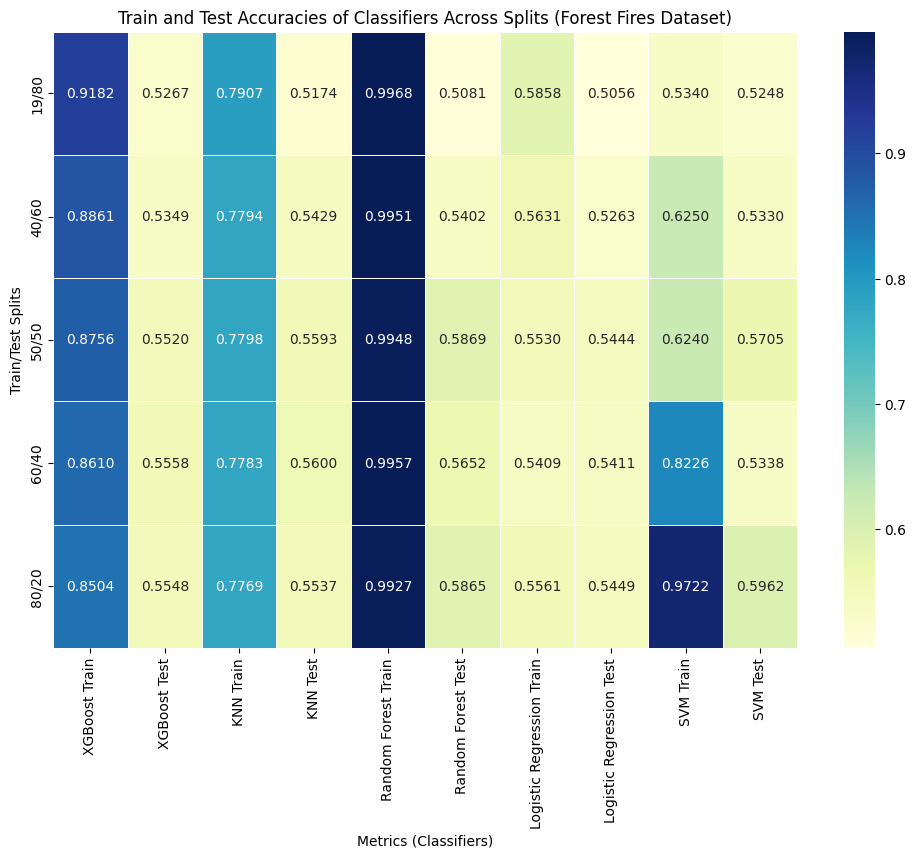

In [121]:
plt.figure(figsize=(12, 8))
sns.heatmap(fire_classifiers_train_test_df, annot=True, cmap='YlGnBu', fmt=".4f", linewidths=0.5)
plt.title('Train and Test Accuracies of Classifiers Across Splits (Forest Fires Dataset)')
plt.xlabel('Metrics (Classifiers)')
plt.ylabel('Train/Test Splits')
plt.show()

### Accuracy Curve

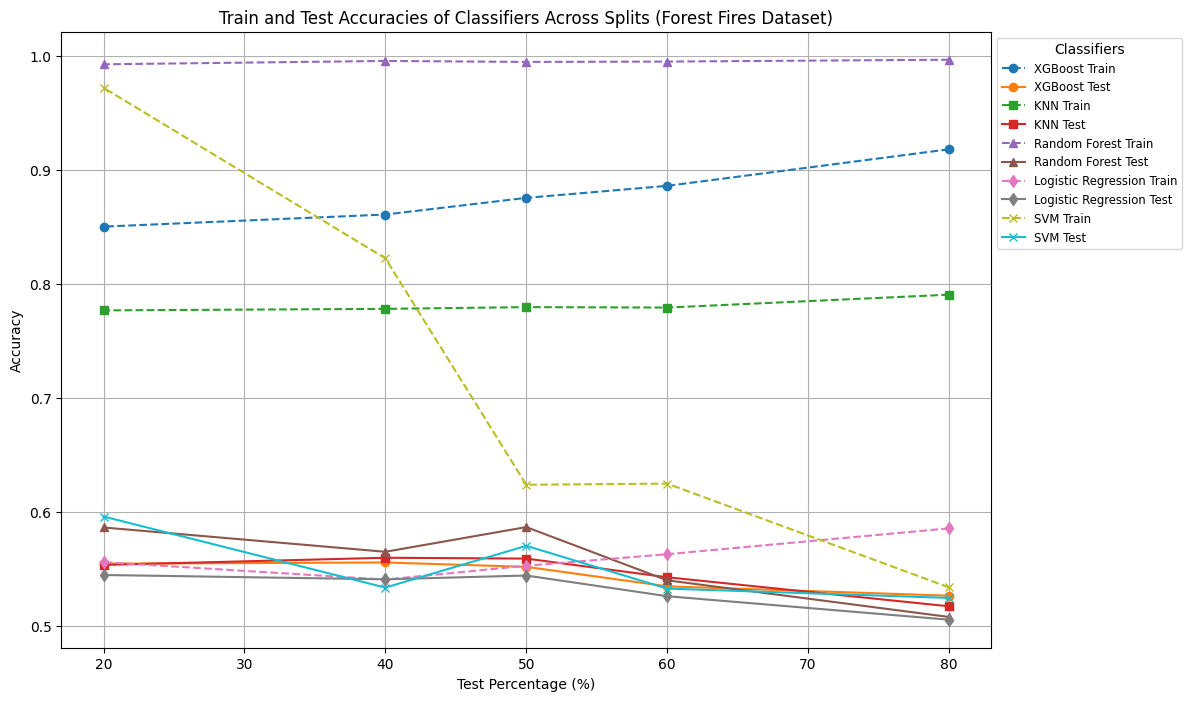

In [122]:
splits = [int(split.split('/')[1]) for split in fire_classifiers_train_test_df.index]
plt.figure(figsize=(12, 8))

plt.plot(splits, fire_classifiers_train_test_df['XGBoost Train'], label='XGBoost Train', marker='o', linestyle='--')
plt.plot(splits, fire_classifiers_train_test_df['XGBoost Test'], label='XGBoost Test', marker='o')

plt.plot(splits, fire_classifiers_train_test_df['KNN Train'], label='KNN Train', marker='s', linestyle='--')
plt.plot(splits, fire_classifiers_train_test_df['KNN Test'], label='KNN Test', marker='s')

plt.plot(splits, fire_classifiers_train_test_df['Random Forest Train'], label='Random Forest Train', marker='^', linestyle='--')
plt.plot(splits, fire_classifiers_train_test_df['Random Forest Test'], label='Random Forest Test', marker='^')

plt.plot(splits, fire_classifiers_train_test_df['Logistic Regression Train'], label='Logistic Regression Train', marker='d', linestyle='--')
plt.plot(splits, fire_classifiers_train_test_df['Logistic Regression Test'], label='Logistic Regression Test', marker='d')

plt.plot(splits, fire_classifiers_train_test_df['SVM Train'], label='SVM Train', marker='x', linestyle='--')
plt.plot(splits, fire_classifiers_train_test_df['SVM Test'], label='SVM Test', marker='x')

plt.title('Train and Test Accuracies of Classifiers Across Splits (Forest Fires Dataset)')
plt.xlabel('Test Percentage (%)')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', title="Classifiers")
plt.grid()
plt.show()

## Iris Dataset

In [209]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [210]:
iris_df = pd.DataFrame(X)
iris_df['target'] = y

In [211]:
iris_df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [212]:
iris_param_grid_rf = {
    'n_estimators': [1024],  # Fixed number of trees
    'max_features': [1, 2, 3, 4]  # Feature set sizes at splits
}

# Binary classification problem
y_binary = iris_df['target'].map({
    'Iris-setosa': 1,  # Positive class
    'Iris-versicolor': 0,  # Negative class
    'Iris-virginica': 0   # Negative class
})

In [213]:
iris_rf = RandomForestClassifier(random_state=23)
iris_gridsearch_rf = GridSearchCV(iris_rf, iris_param_grid_rf, cv=5, scoring='accuracy')

splits = [0.2, 0.4, 0.5, 0.6, 0.8]  # 20/80, 40/60, 50/50, 60/40, and 80/20 splits

In [214]:
iris_rf_results1 = []
iris_rf_results2 = []
iris_rf_results3 = []

## Trial 1

In [215]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=42, stratify=y_binary
    )

    # Fit GridSearchCV
    iris_gridsearch_rf.fit(X_train, y_train)

    # Print the best parameters
    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", iris_gridsearch_rf.best_params_)

    # Evaluate the best model on the test set
    iris_best_params = iris_gridsearch_rf.best_params_
    iris_best_rf = iris_gridsearch_rf.best_estimator_
    
    train_accuracy = accuracy_score(y_train, iris_best_rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, iris_best_rf.predict(X_test))
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    iris_rf_results1.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': iris_best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 1.0000
Best Parameters for 60/40 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 1.0000
Best Parameters for 50/50 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 1.0000
Best Parameters for 40/60 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 1.0000
Best Parameters for 19/80 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accuracy for 19/80 train/test split: 1.0000


In [216]:
iris_rf_results1_df = pd.DataFrame(iris_rf_results1)
iris_rf_results1_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0
1,60/40,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0
2,50/50,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0
3,40/60,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0
4,19/80,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0


### Trial 2

In [217]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=23, stratify=y_binary
    )

    # Fit GridSearchCV
    iris_gridsearch_rf.fit(X_train, y_train)

    # Print the best parameters
    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", iris_gridsearch_rf.best_params_)

    # Evaluate the best model on the test set
    iris_best_params = iris_gridsearch_rf.best_params_
    iris_best_rf = iris_gridsearch_rf.best_estimator_
    
    train_accuracy = accuracy_score(y_train, iris_best_rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, iris_best_rf.predict(X_test))
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    iris_rf_results2.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': iris_best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 1.0000
Best Parameters for 60/40 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 1.0000
Best Parameters for 50/50 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 1.0000
Best Parameters for 40/60 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 1.0000
Best Parameters for 19/80 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accuracy for 19/80 train/test split: 1.0000


In [218]:
iris_rf_results2_df = pd.DataFrame(iris_rf_results2)
iris_rf_results2_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0
1,60/40,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0
2,50/50,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0
3,40/60,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0
4,19/80,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0


### Trial 3

In [219]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=15, stratify=y_binary
    )

    # Fit GridSearchCV
    iris_gridsearch_rf.fit(X_train, y_train)

    # Print the best parameters
    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", iris_gridsearch_rf.best_params_)

    # Evaluate the best model on the test set
    iris_best_params = iris_gridsearch_rf.best_params_
    iris_best_rf = iris_gridsearch_rf.best_estimator_
    
    train_accuracy = accuracy_score(y_train, iris_best_rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, iris_best_rf.predict(X_test))
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    iris_rf_results3.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': iris_best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 1.0000
Best Parameters for 60/40 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 1.0000
Best Parameters for 50/50 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 1.0000
Best Parameters for 40/60 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 1.0000
Best Parameters for 19/80 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accuracy for 19/80 train/test split: 1.0000


In [220]:
iris_rf_results3_df = pd.DataFrame(iris_rf_results3)
iris_rf_results3_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0
1,60/40,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0
2,50/50,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0
3,40/60,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0
4,19/80,"{'max_features': 1, 'n_estimators': 1024}",1.0,1.0


### Iris Random Forest Average Train and Test Accuracies for Splits

In [221]:
iris_rf_combined_results_df = pd.concat(
    [iris_rf_results1_df, iris_rf_results2_df, iris_rf_results3_df], ignore_index=True
)

# Find the average train and test accuracy
average_iris_rf_results_df = iris_rf_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

# Display the averaged results
average_iris_rf_results_df


,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,1.0,1.0
1,40/60,1.0,1.0
2,50/50,1.0,1.0
3,60/40,1.0,1.0
4,80/20,1.0,1.0


### Iris Linear Regression

In [222]:
iris_param_grid_lr = {
    'C': [1e-8, 1e-6, 1e-4, 1e-2, 1, 10, 1e2, 1e4],  
    'penalty': ['none', 'l2'],  
    'solver': ['lbfgs'],  
    'max_iter': [1000]  
}

iris_lr = LogisticRegression(random_state=42)

In [223]:
iris_lr_results1 = []
iris_lr_results2 = []
iris_lr_results3 = []

In [224]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=42, stratify=y_binary
    )

    # Set up GridSearchCV
    iris_gridsearch_lr = GridSearchCV(iris_lr, param_grid=iris_param_grid_lr, cv=5, scoring='accuracy')
    iris_gridsearch_lr.fit(X_train, y_train)

    # Get best model and parameters
    iris_best_lr = iris_gridsearch_lr.best_estimator_
    best_params = iris_gridsearch_lr.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, iris_best_lr.predict(X_train))
    test_accuracy = accuracy_score(y_test, iris_best_lr.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")
    
    # Store results
    iris_lr_results1.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Best Parameters for 80/20 train/test split: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 1.0000
Best Parameters for 60/40 train/test split: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 1.0000
Best Parameters for 50/50 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 1.0000
Best Parameters for 40/60 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 1.0000
Best Parameters for 19/80 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accuracy

In [225]:
iris_lr_results1_df = pd.DataFrame(iris_lr_results1)
iris_lr_results1_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...",1.0,1.0
1,60/40,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...",1.0,1.0
2,50/50,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",1.0,1.0
3,40/60,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",1.0,1.0
4,19/80,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",1.0,1.0


### Trial 2

In [226]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=23, stratify=y_binary
    )

    # Set up GridSearchCV
    iris_gridsearch_lr = GridSearchCV(iris_lr, param_grid=iris_param_grid_lr, cv=5, scoring='accuracy')
    iris_gridsearch_lr.fit(X_train, y_train)

    # Get best model and parameters
    iris_best_lr = iris_gridsearch_lr.best_estimator_
    best_params = iris_gridsearch_lr.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, iris_best_lr.predict(X_train))
    test_accuracy = accuracy_score(y_test, iris_best_lr.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")
    
    # Store results
    iris_lr_results2.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Best Parameters for 80/20 train/test split: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 1.0000
Best Parameters for 60/40 train/test split: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 1.0000
Best Parameters for 50/50 train/test split: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 1.0000
Best Parameters for 40/60 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 1.0000
Best Parameters for 19/80 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accur

In [227]:
iris_lr_results2_df = pd.DataFrame(iris_lr_results2)
iris_lr_results2_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...",1.0,1.0
1,60/40,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...",1.0,1.0
2,50/50,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...",1.0,1.0
3,40/60,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",1.0,1.0
4,19/80,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",1.0,1.0


### Trial 3

In [228]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=15, stratify=y_binary
    )

    # Set up GridSearchCV
    iris_gridsearch_lr = GridSearchCV(iris_lr, param_grid=iris_param_grid_lr, cv=5, scoring='accuracy')
    iris_gridsearch_lr.fit(X_train, y_train)

    # Get best model and parameters
    iris_best_lr = iris_gridsearch_lr.best_estimator_
    best_params = iris_gridsearch_lr.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, iris_best_lr.predict(X_train))
    test_accuracy = accuracy_score(y_test, iris_best_lr.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")
    
    # Store results
    iris_lr_results3.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Best Parameters for 80/20 train/test split: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 1.0000
Best Parameters for 60/40 train/test split: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 1.0000
Best Parameters for 50/50 train/test split: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 1.0000
Best Parameters for 40/60 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 1.0000
Best Parameters for 19/80 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accur

In [229]:
iris_lr_results3_df = pd.DataFrame(iris_lr_results3)
iris_lr_results3_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...",1.0,1.0
1,60/40,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...",1.0,1.0
2,50/50,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2',...",1.0,1.0
3,40/60,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",1.0,1.0
4,19/80,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",1.0,1.0


### Iris Logistic Regression Average Train and Test Accuracies for Splits

In [230]:
iris_lr_combined_results_df = pd.concat(
    [iris_lr_results1_df, iris_lr_results2_df, iris_lr_results3_df], ignore_index=True
)

average_iris_lr_results_df = iris_lr_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_iris_lr_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,1.0,1.0
1,40/60,1.0,1.0
2,50/50,1.0,1.0
3,60/40,1.0,1.0
4,80/20,1.0,1.0


## Iris SVM

In [231]:
iris_param_grid_svm = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 
    'kernel': ['linear', 'poly', 'rbf'],  
    'degree': [2, 3],  
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2],  
    'coef0': [0],  
    'max_iter': [100000]  
}

iris_svm = SVC(random_state=42)

In [232]:
iris_svm_results1 = []
iris_svm_results2 = []
iris_svm_results3 = []

### Trial 1

In [233]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=42, stratify=y_binary
    )

    # Set up GridSearchCV
    iris_gridsearch_svm = GridSearchCV(iris_svm, param_grid=iris_param_grid_svm, cv=5, scoring='accuracy')
    iris_gridsearch_svm.fit(X_train, y_train)

    # Get best model and parameters
    iris_best_svm = iris_gridsearch_svm.best_estimator_
    best_params = iris_gridsearch_svm.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, iris_best_svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, iris_best_svm.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    iris_svm_results1.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Best Parameters for 80/20 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 1.0000
Best Parameters for 60/40 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 1.0000
Best Parameters for 50/50 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 1.0000
Best Parameters for 40/60 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 1.0000
Best Parameters for 19/80 train/test split: {'C': 1e-06, 'coef0': 0, 'degree

In [234]:
iris_svm_results1_df = pd.DataFrame(iris_svm_results1)
iris_svm_results1_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,1.000000
1,60/40,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,1.000000
2,50/50,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,1.000000
3,40/60,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,1.000000
4,19/80,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,0.991667


### Trial 2

In [235]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=23, stratify=y_binary
    )

    # Set up GridSearchCV
    iris_gridsearch_svm = GridSearchCV(iris_svm, param_grid=iris_param_grid_svm, cv=5, scoring='accuracy')
    iris_gridsearch_svm.fit(X_train, y_train)

    # Get best model and parameters
    iris_best_svm = iris_gridsearch_svm.best_estimator_
    best_params = iris_gridsearch_svm.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, iris_best_svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, iris_best_svm.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    iris_svm_results2.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Best Parameters for 80/20 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 1.0000
Best Parameters for 60/40 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 1.0000
Best Parameters for 50/50 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9867
Best Parameters for 40/60 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 0.9889
Best Parameters for 19/80 train/test split: {'C': 1e-06, 'coef0': 0, 'degree

In [236]:
iris_svm_results2_df = pd.DataFrame(iris_svm_results2)
iris_svm_results2_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,1.000000
1,60/40,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,1.000000
2,50/50,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,0.986667
3,40/60,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,0.988889
4,19/80,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,0.991667


### Trial 3

In [237]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=15, stratify=y_binary
    )

    # Set up GridSearchCV
    iris_gridsearch_svm = GridSearchCV(iris_svm, param_grid=iris_param_grid_svm, cv=5, scoring='accuracy')
    iris_gridsearch_svm.fit(X_train, y_train)

    # Get best model and parameters
    iris_best_svm = iris_gridsearch_svm.best_estimator_
    best_params = iris_gridsearch_svm.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, iris_best_svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, iris_best_svm.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    iris_svm_results3.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Best Parameters for 80/20 train/test split: {'C': 1e-05, 'coef0': 0, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 1.0000
Best Parameters for 60/40 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 1.0000
Best Parameters for 50/50 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 1.0000
Best Parameters for 40/60 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma': 2, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 1.0000
Best Parameters for 19/80 train/test split: {'C': 1e-06, 'coef0': 0, 'degree

In [238]:
iris_svm_results3_df = pd.DataFrame(iris_svm_results3)
iris_svm_results3_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 1e-05, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,1.00
1,60/40,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,1.00
2,50/50,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,1.00
3,40/60,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,1.00
4,19/80,"{'C': 1e-06, 'coef0': 0, 'degree': 3, 'gamma':...",1.0,0.95


### Iris SVM Average Train and Test Accuracies for Splits

In [239]:
iris_svm_combined_results_df = pd.concat(
    [iris_svm_results1_df, iris_svm_results2_df, iris_svm_results3_df], ignore_index=True
)

average_iris_svm_results_df = iris_svm_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_iris_svm_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,1.0,0.977778
1,40/60,1.0,0.996296
2,50/50,1.0,0.995556
3,60/40,1.0,1.000000
4,80/20,1.0,1.000000


### Iris Boosted Tree

In [240]:
iris_param_grid_xgb = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

iris_xgb_results1 = []
iris_xgb_results2 = []
iris_xgb_results3 = []

### Trial 1

In [241]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=42, stratify=y_binary
    )

    for n_estimators in iris_param_grid_xgb:
        # Initialize XGBoost model with only n_estimators varying
        iris_bt = XGBClassifier(
            n_estimators=n_estimators,  # From Caruana's settings
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )

        # Train the model
        iris_bt.fit(X_train, y_train)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, iris_bt.predict(X_train))
        test_accuracy = accuracy_score(y_test, iris_bt.predict(X_test))

        # Store results
        iris_xgb_results1.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'n_estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })

In [242]:
iris_xgb_results1_df = pd.DataFrame(iris_xgb_results1)
iris_xgb_results1_df

,Split (Train/Test),n_estimators,Train Accuracy,Test Accuracy
0,80/20,2,1.0,1.000000
1,80/20,4,1.0,1.000000
2,80/20,8,1.0,1.000000
3,80/20,16,1.0,1.000000
4,80/20,32,1.0,1.000000
5,80/20,64,1.0,1.000000
6,80/20,128,1.0,1.000000
7,80/20,256,1.0,1.000000
8,80/20,512,1.0,1.000000
9,80/20,1024,1.0,1.000000


### Trial 2

In [243]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=23, stratify=y_binary
    )

    for n_estimators in iris_param_grid_xgb:
        # Initialize XGBoost model with only n_estimators varying
        iris_bt = XGBClassifier(
            n_estimators=n_estimators,  # From Caruana's settings
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )

        # Train the model
        iris_bt.fit(X_train, y_train)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, iris_bt.predict(X_train))
        test_accuracy = accuracy_score(y_test, iris_bt.predict(X_test))

        # Store results
        iris_xgb_results2.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'n_estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })

In [244]:
iris_xgb_results2_df = pd.DataFrame(iris_xgb_results2)
iris_xgb_results2_df

,Split (Train/Test),n_estimators,Train Accuracy,Test Accuracy
0,80/20,2,1.0,1.000000
1,80/20,4,1.0,1.000000
2,80/20,8,1.0,1.000000
3,80/20,16,1.0,1.000000
4,80/20,32,1.0,1.000000
5,80/20,64,1.0,1.000000
6,80/20,128,1.0,1.000000
7,80/20,256,1.0,1.000000
8,80/20,512,1.0,1.000000
9,80/20,1024,1.0,1.000000


### Trial 3

In [245]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=15, stratify=y_binary
    )

    for n_estimators in iris_param_grid_xgb:
        # Initialize XGBoost model with only n_estimators varying
        iris_bt = XGBClassifier(
            n_estimators=n_estimators,  # From Caruana's settings
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )

        # Train the model
        iris_bt.fit(X_train, y_train)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, iris_bt.predict(X_train))
        test_accuracy = accuracy_score(y_test, iris_bt.predict(X_test))

        # Store results
        iris_xgb_results3.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'n_estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })

In [246]:
iris_xgb_results3_df = pd.DataFrame(iris_xgb_results1)
iris_xgb_results3_df

,Split (Train/Test),n_estimators,Train Accuracy,Test Accuracy
0,80/20,2,1.0,1.000000
1,80/20,4,1.0,1.000000
2,80/20,8,1.0,1.000000
3,80/20,16,1.0,1.000000
4,80/20,32,1.0,1.000000
5,80/20,64,1.0,1.000000
6,80/20,128,1.0,1.000000
7,80/20,256,1.0,1.000000
8,80/20,512,1.0,1.000000
9,80/20,1024,1.0,1.000000


### Iris Boosted Tree Average Train and Test Accuracies for Splits

In [247]:
iris_bt_combined_results_df = pd.concat(
    [iris_xgb_results1_df, iris_xgb_results2_df, iris_xgb_results3_df], ignore_index=True
)

average_iris_bt_results_df = iris_bt_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_iris_bt_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,1.0,0.975000
1,40/60,1.0,0.974074
2,50/50,1.0,0.986667
3,60/40,1.0,0.983333
4,80/20,1.0,1.000000


## Iris KNN 

In [248]:
iris_knn_results1 = []
iris_knn_results2 = []
iris_knn_results3 = []

### Trial 1

In [249]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=42, stratify=y_binary
    )
    
    # Get values of K based on training set size
    k_values = get_k_values(train_size=len(X_train))
    
    # Iterate through K values
    for k in k_values:
        # Euclidean distance, uniform weights
        knn_uniform = KNeighborsClassifier(
            n_neighbors=k, weights='uniform', metric='euclidean'
        )
        knn_uniform.fit(X_train, y_train)
        train_accuracy_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
        test_accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

        # Distance-weighted KNN (gain ratio approximation)
        knn_distance = KNeighborsClassifier(
            n_neighbors=k, weights='distance', metric='euclidean'
        )
        knn_distance.fit(X_train, y_train)
        train_accuracy_distance = accuracy_score(y_train, knn_distance.predict(X_train))
        test_accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

        iris_knn_results1.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Uniform',
            'Train Accuracy': train_accuracy_uniform,
            'Test Accuracy': test_accuracy_uniform
        })

        iris_knn_results1.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Distance',
            'Train Accuracy': train_accuracy_distance,
            'Test Accuracy': test_accuracy_distance
        })

In [250]:
iris_knn_results1_df = pd.DataFrame(iris_knn_results1)
iris_knn_results1_df

,Split (Train/Test),K,Weights,Train Accuracy,Test Accuracy
0,80/20,1,Uniform,1.000000,1.000000
1,80/20,1,Distance,1.000000,1.000000
2,80/20,5,Uniform,1.000000,1.000000
3,80/20,5,Distance,1.000000,1.000000
4,80/20,10,Uniform,1.000000,1.000000
...,...,...,...,...,...
255,19/80,27,Distance,1.000000,1.000000
256,19/80,28,Uniform,0.666667,0.666667
257,19/80,28,Distance,1.000000,1.000000
258,19/80,30,Uniform,0.666667,0.666667


### Trial 2

In [251]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=23, stratify=y_binary
    )
    
    # Get values of K based on training set size
    k_values = get_k_values(train_size=len(X_train))
    
    # Iterate through K values
    for k in k_values:
        # Euclidean distance, uniform weights
        knn_uniform = KNeighborsClassifier(
            n_neighbors=k, weights='uniform', metric='euclidean'
        )
        knn_uniform.fit(X_train, y_train)
        train_accuracy_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
        test_accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

        # Distance-weighted KNN (gain ratio approximation)
        knn_distance = KNeighborsClassifier(
            n_neighbors=k, weights='distance', metric='euclidean'
        )
        knn_distance.fit(X_train, y_train)
        train_accuracy_distance = accuracy_score(y_train, knn_distance.predict(X_train))
        test_accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

        iris_knn_results2.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Uniform',
            'Train Accuracy': train_accuracy_uniform,
            'Test Accuracy': test_accuracy_uniform
        })

        iris_knn_results2.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Distance',
            'Train Accuracy': train_accuracy_distance,
            'Test Accuracy': test_accuracy_distance
        })

In [252]:
iris_knn_results2_df = pd.DataFrame(iris_knn_results1)
iris_knn_results2_df

,Split (Train/Test),K,Weights,Train Accuracy,Test Accuracy
0,80/20,1,Uniform,1.000000,1.000000
1,80/20,1,Distance,1.000000,1.000000
2,80/20,5,Uniform,1.000000,1.000000
3,80/20,5,Distance,1.000000,1.000000
4,80/20,10,Uniform,1.000000,1.000000
...,...,...,...,...,...
255,19/80,27,Distance,1.000000,1.000000
256,19/80,28,Uniform,0.666667,0.666667
257,19/80,28,Distance,1.000000,1.000000
258,19/80,30,Uniform,0.666667,0.666667


### Trial 3

In [253]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        iris_df.drop(columns='target'), y_binary, test_size=split, random_state=15, stratify=y_binary
    )
    
    # Get values of K based on training set size
    k_values = get_k_values(train_size=len(X_train))
    
    # Iterate through K values
    for k in k_values:
        # Euclidean distance, uniform weights
        knn_uniform = KNeighborsClassifier(
            n_neighbors=k, weights='uniform', metric='euclidean'
        )
        knn_uniform.fit(X_train, y_train)
        train_accuracy_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
        test_accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

        # Distance-weighted KNN (gain ratio approximation)
        knn_distance = KNeighborsClassifier(
            n_neighbors=k, weights='distance', metric='euclidean'
        )
        knn_distance.fit(X_train, y_train)
        train_accuracy_distance = accuracy_score(y_train, knn_distance.predict(X_train))
        test_accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

        iris_knn_results3.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Uniform',
            'Train Accuracy': train_accuracy_uniform,
            'Test Accuracy': test_accuracy_uniform
        })

        iris_knn_results3.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Distance',
            'Train Accuracy': train_accuracy_distance,
            'Test Accuracy': test_accuracy_distance
        })

In [254]:
iris_knn_results3_df = pd.DataFrame(iris_knn_results3)
iris_knn_results3_df

,Split (Train/Test),K,Weights,Train Accuracy,Test Accuracy
0,80/20,1,Uniform,1.000000,1.000000
1,80/20,1,Distance,1.000000,1.000000
2,80/20,5,Uniform,1.000000,1.000000
3,80/20,5,Distance,1.000000,1.000000
4,80/20,10,Uniform,1.000000,1.000000
...,...,...,...,...,...
255,19/80,27,Distance,1.000000,1.000000
256,19/80,28,Uniform,0.666667,0.666667
257,19/80,28,Distance,1.000000,1.000000
258,19/80,30,Uniform,0.666667,0.666667


### Iris KNN Average Train and Test Accuracies for Splits

In [255]:
iris_knn_combined_results_df = pd.concat(
    [iris_knn_results1_df, iris_knn_results2_df, iris_knn_results3_df], ignore_index=True
)

average_iris_knn_results_df = iris_knn_combined_results_df.groupby(['Split (Train/Test)', 'Weights'])[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_iris_knn_results_df

,Split (Train/Test),Weights,Train Accuracy,Test Accuracy
0,19/80,Distance,1.000000,1.000000
1,19/80,Uniform,0.884615,0.883974
2,40/60,Distance,1.000000,1.000000
3,40/60,Uniform,0.884615,0.883761
4,50/50,Distance,1.000000,1.000000
5,50/50,Uniform,0.883761,0.884615
6,60/40,Distance,1.000000,1.000000
7,60/40,Uniform,0.883761,0.884615
8,80/20,Distance,1.000000,1.000000
9,80/20,Uniform,0.883868,0.884615


## Comparison of Classifiers on Forest Fires Dataset

### Heatmap

In [262]:
iris_classifiers_train_test_df = pd.DataFrame({
    'Split (Train/Test)': average_iris_bt_results_df['Split (Train/Test)'],
    'Boosted Trees Train': average_iris_bt_results_df['Train Accuracy'],
    'Boosted Trees Test': average_iris_bt_results_df['Test Accuracy'],
    'KNN Train': average_iris_knn_results_df['Train Accuracy'],
    'KNN Test': average_iris_knn_results_df['Test Accuracy'],
    'Random Forest Train': average_iris_rf_results_df['Train Accuracy'],
    'Random Forest Test': average_iris_rf_results_df['Test Accuracy'],
    'Logistic Regression Train': average_iris_lr_results_df['Train Accuracy'],
    'Logistic Regression Test': average_iris_lr_results_df['Test Accuracy'],
    'SVM Train': average_iris_svm_results_df['Train Accuracy'],
    'SVM Test': average_iris_svm_results_df['Test Accuracy']
})
iris_classifiers_train_test_df = iris_classifiers_train_test_df.drop(index=range(5, 10))
iris_classifiers_train_test_df

,Split (Train/Test),Boosted Trees Train,Boosted Trees Test,KNN Train,KNN Test,Random Forest Train,Random Forest Test,Logistic Regression Train,Logistic Regression Test,SVM Train,SVM Test
0,19/80,1.0,0.975000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,0.977778
1,40/60,1.0,0.974074,0.884615,0.883974,1.0,1.0,1.0,1.0,1.0,0.996296
2,50/50,1.0,0.986667,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,0.995556
3,60/40,1.0,0.983333,0.884615,0.883761,1.0,1.0,1.0,1.0,1.0,1.000000
4,80/20,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000


In [263]:
iris_classifiers_train_test_df.set_index('Split (Train/Test)', inplace=True)

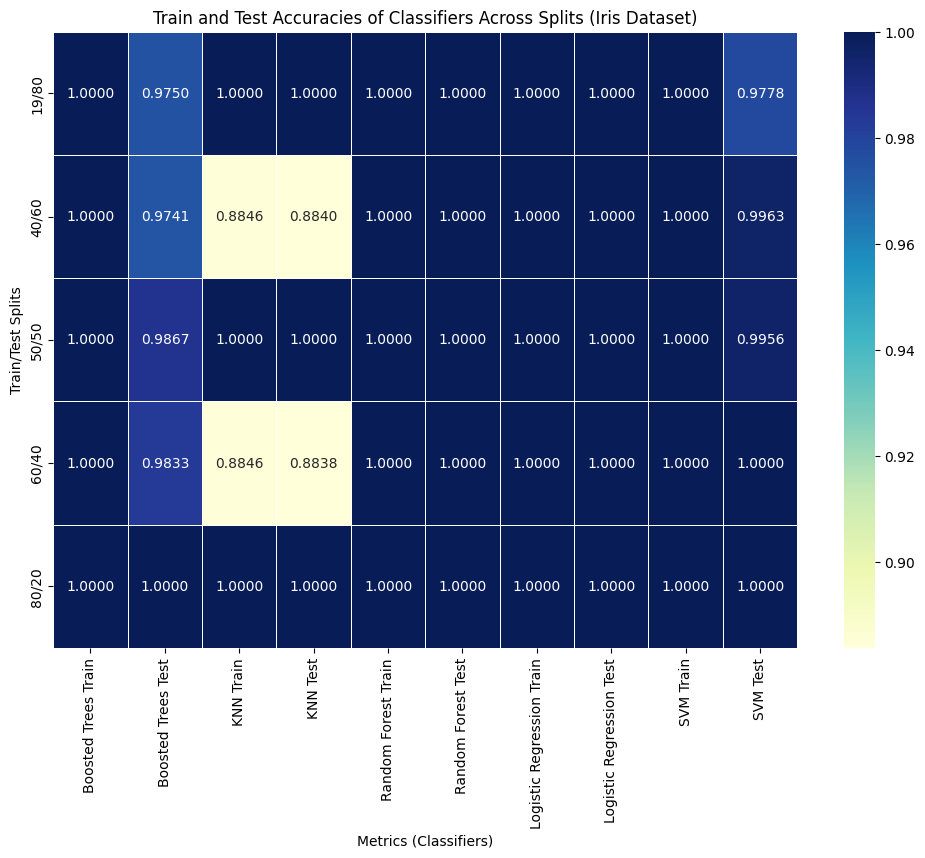

In [264]:
plt.figure(figsize=(12, 8))
sns.heatmap(iris_classifiers_train_test_df, annot=True, cmap='YlGnBu', fmt=".4f", linewidths=0.5)
plt.title('Train and Test Accuracies of Classifiers Across Splits (Iris Dataset)')
plt.xlabel('Metrics (Classifiers)')
plt.ylabel('Train/Test Splits')
plt.show()

In [265]:
splits = [int(split.split('/')[1]) for split in iris_classifiers_train_test_df.index]
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

### Acccuracy Curve

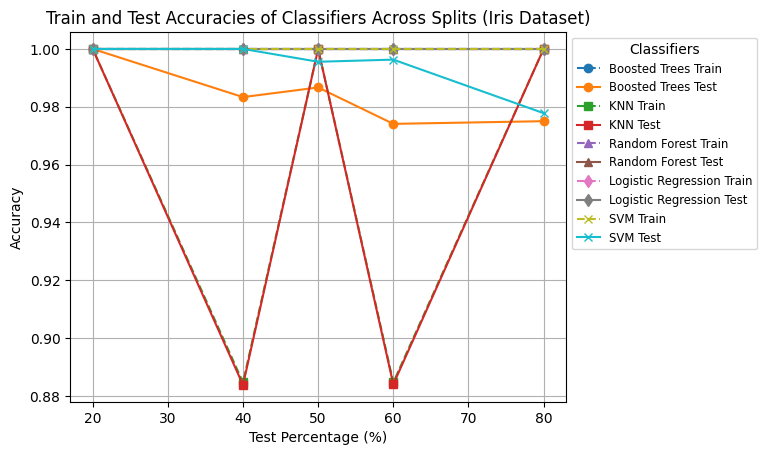

In [266]:
plt.plot(splits, iris_classifiers_train_test_df['Boosted Trees Train'], label='Boosted Trees Train', marker='o', linestyle='--')
plt.plot(splits, iris_classifiers_train_test_df['Boosted Trees Test'], label='Boosted Trees Test', marker='o')

plt.plot(splits, iris_classifiers_train_test_df['KNN Train'], label='KNN Train', marker='s', linestyle='--')
plt.plot(splits, iris_classifiers_train_test_df['KNN Test'], label='KNN Test', marker='s')

plt.plot(splits, iris_classifiers_train_test_df['Random Forest Train'], label='Random Forest Train', marker='^', linestyle='--')
plt.plot(splits, iris_classifiers_train_test_df['Random Forest Test'], label='Random Forest Test', marker='^')

plt.plot(splits, iris_classifiers_train_test_df['Logistic Regression Train'], label='Logistic Regression Train', marker='d', linestyle='--')
plt.plot(splits, iris_classifiers_train_test_df['Logistic Regression Test'], label='Logistic Regression Test', marker='d')

plt.plot(splits, iris_classifiers_train_test_df['SVM Train'], label='SVM Train', marker='x', linestyle='--')
plt.plot(splits, iris_classifiers_train_test_df['SVM Test'], label='SVM Test', marker='x')

# Add labels, title, legend, and grid
plt.title('Train and Test Accuracies of Classifiers Across Splits (Iris Dataset)')
plt.xlabel('Test Percentage (%)')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', title="Classifiers")
plt.grid()
plt.show()

## Breast Cancer Dataset

In [267]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [270]:
cancer_df = pd.DataFrame(X)
cancer_df['target'] = y

# target category in binary
cancer_df['target'] = cancer_df['target'].map({'M': 1, 'B': 0})

### Cancer Random Forest

In [274]:
cancer_param_grid_rf = {
    'n_estimators': [1024],  # Fixed number of trees
    'max_features': [1, 2, 4, 6, 8, 12, 16, 20]  # Feature set sizes at splits
}

cancer_rf = RandomForestClassifier(random_state=23)
cancer_gridsearch_rf = GridSearchCV(cancer_rf, cancer_param_grid_rf, cv=5, scoring='accuracy')

splits = [0.2, 0.4, 0.5, 0.6, 0.8]  # 20/80, 40/60, 50/50, 60/40, and 80/20 splits


In [275]:
cancer_rf_results1 = []
cancer_rf_results2 = []
cancer_rf_results3 = []

### Trial 1

In [279]:
for split in splits:
    # Stratified split to maintain class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], 
        test_size=split, random_state=42, stratify=cancer_df['target']
    )

    # Fit GridSearchCV
    cancer_gridsearch_rf.fit(X_train, y_train)

    # Print the best parameters
    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", cancer_gridsearch_rf.best_params_)

    # Evaluate the best model on the test set
    cancer_best_params = cancer_gridsearch_rf.best_params_
    cancer_best_rf = cancer_gridsearch_rf.best_estimator_

    train_accuracy = accuracy_score(y_train, cancer_best_rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, cancer_best_rf.predict(X_test))
    
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    cancer_rf_results1.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': cancer_best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Best Parameters for 80/20 train/test split: {'max_features': 20, 'n_estimators': 1024}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 0.9737
Best Parameters for 60/40 train/test split: {'max_features': 6, 'n_estimators': 1024}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 0.9693
Best Parameters for 50/50 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9649
Best Parameters for 40/60 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 0.9649
Best Parameters for 19/80 train/test split: {'max_features': 2, 'n_estimators': 1024}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accuracy for 19/80 train/test split: 0.9496


In [280]:
cancer_rf_results1_df = pd.DataFrame(cancer_rf_results1)
cancer_rf_results1_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'max_features': 20, 'n_estimators': 1024}",1.0,0.973684
1,60/40,"{'max_features': 6, 'n_estimators': 1024}",1.0,0.969298
2,50/50,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.964912
3,40/60,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.964912
4,19/80,"{'max_features': 2, 'n_estimators': 1024}",1.0,0.949561
5,80/20,"{'max_features': 20, 'n_estimators': 1024}",1.0,0.973684
6,60/40,"{'max_features': 6, 'n_estimators': 1024}",1.0,0.969298
7,50/50,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.964912
8,40/60,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.964912
9,19/80,"{'max_features': 2, 'n_estimators': 1024}",1.0,0.949561


### Trial 2

In [281]:
for split in splits:
    # Stratified split to maintain class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], 
        test_size=split, random_state=23, stratify=cancer_df['target']
    )

    # Fit GridSearchCV
    cancer_gridsearch_rf.fit(X_train, y_train)

    # Print the best parameters
    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", cancer_gridsearch_rf.best_params_)

    # Evaluate the best model on the test set
    cancer_best_params = cancer_gridsearch_rf.best_params_
    cancer_best_rf = cancer_gridsearch_rf.best_estimator_

    train_accuracy = accuracy_score(y_train, cancer_best_rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, cancer_best_rf.predict(X_test))
    
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    cancer_rf_results2.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': cancer_best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Best Parameters for 80/20 train/test split: {'max_features': 6, 'n_estimators': 1024}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 0.9474
Best Parameters for 60/40 train/test split: {'max_features': 4, 'n_estimators': 1024}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 0.9605
Best Parameters for 50/50 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9754
Best Parameters for 40/60 train/test split: {'max_features': 12, 'n_estimators': 1024}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 0.9678
Best Parameters for 19/80 train/test split: {'max_features': 2, 'n_estimators': 1024}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accuracy for 19/80 train/test split: 0.9605


In [282]:
cancer_rf_results2_df = pd.DataFrame(cancer_rf_results2)
cancer_rf_results2_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'max_features': 6, 'n_estimators': 1024}",1.0,0.947368
1,80/20,"{'max_features': 6, 'n_estimators': 1024}",1.0,0.947368
2,60/40,"{'max_features': 4, 'n_estimators': 1024}",1.0,0.960526
3,50/50,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.975439
4,40/60,"{'max_features': 12, 'n_estimators': 1024}",1.0,0.967836
5,19/80,"{'max_features': 2, 'n_estimators': 1024}",1.0,0.960526


### Trial 3

In [283]:
for split in splits:
    # Stratified split to maintain class distribution
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], 
        test_size=split, random_state=15, stratify=cancer_df['target']
    )

    # Fit GridSearchCV
    cancer_gridsearch_rf.fit(X_train, y_train)

    # Print the best parameters
    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", cancer_gridsearch_rf.best_params_)

    # Evaluate the best model on the test set
    cancer_best_params = cancer_gridsearch_rf.best_params_
    cancer_best_rf = cancer_gridsearch_rf.best_estimator_

    train_accuracy = accuracy_score(y_train, cancer_best_rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, cancer_best_rf.predict(X_test))
    
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    cancer_rf_results3.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': cancer_best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Best Parameters for 80/20 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 80/20 train/test split: 1.0000
Test Accuracy for 80/20 train/test split: 0.9737
Best Parameters for 60/40 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 60/40 train/test split: 1.0000
Test Accuracy for 60/40 train/test split: 0.9518
Best Parameters for 50/50 train/test split: {'max_features': 6, 'n_estimators': 1024}
Train Accuracy for 50/50 train/test split: 1.0000
Test Accuracy for 50/50 train/test split: 0.9509
Best Parameters for 40/60 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 40/60 train/test split: 1.0000
Test Accuracy for 40/60 train/test split: 0.9591
Best Parameters for 19/80 train/test split: {'max_features': 1, 'n_estimators': 1024}
Train Accuracy for 19/80 train/test split: 1.0000
Test Accuracy for 19/80 train/test split: 0.9452


In [284]:
cancer_rf_results3_df = pd.DataFrame(cancer_rf_results3)
cancer_rf_results3_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.973684
1,60/40,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.951754
2,50/50,"{'max_features': 6, 'n_estimators': 1024}",1.0,0.950877
3,40/60,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.959064
4,19/80,"{'max_features': 1, 'n_estimators': 1024}",1.0,0.945175


### Cancer Random Forest Average Train and Test Accuracies for Splits

In [285]:
cancer_rf_combined_results_df = pd.concat(
    [cancer_rf_results1_df, cancer_rf_results2_df, cancer_rf_results3_df], ignore_index=True
)

average_cancer_rf_results_df = cancer_rf_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_cancer_rf_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,1.0,0.951206
1,40/60,1.0,0.964181
2,50/50,1.0,0.964035
3,60/40,1.0,0.962719
4,80/20,1.0,0.963158


## Cancer Logistic Regression

In [286]:
cancer_param_grid_lr = {
    'C': [1e-8, 1e-6, 1e-4, 1e-2, 1, 10, 1e2, 1e4], 
    'penalty': ['none', 'l2'], 
    'solver': ['lbfgs'],  
    'max_iter': [1000]  
}

cancer_lr = LogisticRegression(random_state=42)

cancer_lr_results1 = []
cancer_lr_results2 = []
cancer_lr_results3 = []

### Trial 1

In [287]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], test_size=split, random_state=42, stratify=cancer_df['target']
    )

    # Set up GridSearchCV
    cancer_gridsearch_lr = GridSearchCV(cancer_lr, param_grid=cancer_param_grid_lr, cv=5, scoring='accuracy')
    cancer_gridsearch_lr.fit(X_train, y_train)

    # Get best model and parameters
    cancer_best_lr = cancer_gridsearch_lr.best_estimator_
    best_params = cancer_gridsearch_lr.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, cancer_best_lr.predict(X_train))
    test_accuracy = accuracy_score(y_test, cancer_best_lr.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")
    
    # Store results
    cancer_lr_results1.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 80/20 train/test split: 0.9780
Test Accuracy for 80/20 train/test split: 0.9298
Best Parameters for 60/40 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 60/40 train/test split: 0.9765
Test Accuracy for 60/40 train/test split: 0.9474
Best Parameters for 50/50 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 50/50 train/test split: 0.9718
Test Accuracy for 50/50 train/test split: 0.9579
Best Parameters for 40/60 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 40/60 train/test split: 0.9736
Test Accuracy for 40/60 train/test split: 0.9532
Best Parameters for 19/80 train/test split: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 19/80 train/test split: 0.9912
Te

In [288]:
cancer_lr_results1_df = pd.DataFrame(cancer_lr_results1)
cancer_lr_results1_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",0.978022,0.929825
1,60/40,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",0.976540,0.947368
2,50/50,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",0.971831,0.957895
3,40/60,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",0.973568,0.953216
4,19/80,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",0.991150,0.945175


### Trial 2

In [289]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], test_size=split, random_state=23, stratify=cancer_df['target']
    )

    # Set up GridSearchCV
    cancer_gridsearch_lr = GridSearchCV(cancer_lr, param_grid=cancer_param_grid_lr, cv=5, scoring='accuracy')
    cancer_gridsearch_lr.fit(X_train, y_train)

    # Get best model and parameters
    cancer_best_lr = cancer_gridsearch_lr.best_estimator_
    best_params = cancer_gridsearch_lr.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, cancer_best_lr.predict(X_train))
    test_accuracy = accuracy_score(y_test, cancer_best_lr.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")
    
    # Store results
    cancer_lr_results2.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 10000.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 80/20 train/test split: 0.9714
Test Accuracy for 80/20 train/test split: 0.9474
Best Parameters for 60/40 train/test split: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 60/40 train/test split: 0.9736
Test Accuracy for 60/40 train/test split: 0.9518
Best Parameters for 50/50 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 50/50 train/test split: 0.9542
Test Accuracy for 50/50 train/test split: 0.9474
Best Parameters for 40/60 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 40/60 train/test split: 0.9868
Test Accuracy for 40/60 train/test split: 0.9532
Best Parameters for 19/80 train/test split: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 19/80 train/test split: 0.9823
Test Ac

In [290]:
cancer_lr_results2_df = pd.DataFrame(cancer_lr_results2)
cancer_lr_results2_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 10000.0, 'max_iter': 1000, 'penalty': 'l...",0.971429,0.947368
1,60/40,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",0.973607,0.951754
2,50/50,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",0.954225,0.947368
3,40/60,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",0.986784,0.953216
4,19/80,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",0.982301,0.962719


### Trial 3

In [291]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], test_size=split, random_state=15, stratify=cancer_df['target']
    )

    # Set up GridSearchCV
    cancer_gridsearch_lr = GridSearchCV(cancer_lr, param_grid=cancer_param_grid_lr, cv=5, scoring='accuracy')
    cancer_gridsearch_lr.fit(X_train, y_train)

    # Get best model and parameters
    cancer_best_lr = cancer_gridsearch_lr.best_estimator_
    best_params = cancer_gridsearch_lr.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, cancer_best_lr.predict(X_train))
    test_accuracy = accuracy_score(y_test, cancer_best_lr.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")
    
    # Store results
    cancer_lr_results3.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 80/20 train/test split: 0.9604
Test Accuracy for 80/20 train/test split: 0.9825
Best Parameters for 60/40 train/test split: {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 60/40 train/test split: 0.9589
Test Accuracy for 60/40 train/test split: 0.9561
Best Parameters for 50/50 train/test split: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 50/50 train/test split: 0.9613
Test Accuracy for 50/50 train/test split: 0.9684
Best Parameters for 40/60 train/test split: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 40/60 train/test split: 0.9559
Test Accuracy for 40/60 train/test split: 0.9532
Best Parameters for 19/80 train/test split: {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Accuracy for 19/80 train/test split: 0.9469
Test 

In [292]:
cancer_lr_results3_df = pd.DataFrame(cancer_lr_results3)
cancer_lr_results3_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",0.960440,0.982456
1,60/40,"{'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'...",0.958944,0.956140
2,50/50,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",0.961268,0.968421
3,40/60,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",0.955947,0.953216
4,19/80,"{'C': 0.0001, 'max_iter': 1000, 'penalty': 'l2...",0.946903,0.923246


### Cancer Logistic Regression Average Train and Test Accuracies for Splits

In [293]:
cancer_lr_combined_results_df = pd.concat(
    [cancer_lr_results1_df, cancer_lr_results2_df, cancer_lr_results3_df], ignore_index=True
)

average_cancer_lr_results_df = cancer_lr_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_cancer_lr_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,0.973451,0.943713
1,40/60,0.972100,0.953216
2,50/50,0.962441,0.957895
3,60/40,0.969697,0.951754
4,80/20,0.969963,0.953216


## Cancer SVM

In [294]:
cancer_param_grid_svm = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 
    'kernel': ['linear', 'poly', 'rbf'],  
    'degree': [2, 3],  
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2],  
    'coef0': [0],  
    'max_iter': [100000]  
}

cancer_svm = SVC(random_state=42)
splits = [0.2, 0.4, 0.5, 0.6, 0.8]  # 20/80, 40/60, 50/50, 60/40, and 80/20 splits

In [295]:
cancer_svm_results1 = []
cancer_svm_results2 = []
cancer_svm_results3 = []

### Trial 1

In [296]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], test_size=split, random_state=42, stratify=cancer_df['target']
    )

    # Set up GridSearchCV
    cancer_gridsearch_svm = GridSearchCV(cancer_svm, param_grid=cancer_param_grid_svm, cv=5, scoring='accuracy')
    cancer_gridsearch_svm.fit(X_train, y_train)

    # Get best model and parameters
    cancer_best_svm = cancer_gridsearch_svm.best_estimator_
    best_params = cancer_gridsearch_svm.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, cancer_best_svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, cancer_best_svm.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    cancer_svm_results1.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 1e-05, 'coef0': 0, 'degree': 2, 'gamma': 0.05, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 80/20 train/test split: 0.9626
Test Accuracy for 80/20 train/test split: 0.9561
Best Parameters for 60/40 train/test split: {'C': 1e-05, 'coef0': 0, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 60/40 train/test split: 0.9238
Test Accuracy for 60/40 train/test split: 0.8947
Best Parameters for 50/50 train/test split: {'C': 1e-06, 'coef0': 0, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 50/50 train/test split: 0.9401
Test Accuracy for 50/50 train/test split: 0.9719
Best Parameters for 40/60 train/test split: {'C': 1e-05, 'coef0': 0, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 40/60 train/test split: 0.9604
Test Accuracy for 40/60 train/test split: 0.9444
Best Parameters for 19/80 train/test split: {'C': 10, 'coef0': 0,

In [297]:
cancer_svm_results1_df = pd.DataFrame(cancer_svm_results1)
cancer_svm_results1_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 1e-05, 'coef0': 0, 'degree': 2, 'gamma':...",0.962637,0.956140
1,60/40,"{'C': 1e-05, 'coef0': 0, 'degree': 3, 'gamma':...",0.923754,0.894737
2,50/50,"{'C': 1e-06, 'coef0': 0, 'degree': 2, 'gamma':...",0.940141,0.971930
3,40/60,"{'C': 1e-05, 'coef0': 0, 'degree': 2, 'gamma':...",0.960352,0.944444
4,19/80,"{'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 0....",0.982301,0.914474


### Trial 2

In [298]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], test_size=split, random_state=23, stratify=cancer_df['target']
    )

    # Set up GridSearchCV
    cancer_gridsearch_svm = GridSearchCV(cancer_svm, param_grid=cancer_param_grid_svm, cv=5, scoring='accuracy')
    cancer_gridsearch_svm.fit(X_train, y_train)

    # Get best model and parameters
    cancer_best_svm = cancer_gridsearch_svm.best_estimator_
    best_params = cancer_gridsearch_svm.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, cancer_best_svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, cancer_best_svm.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    cancer_svm_results2.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 0.0001, 'coef0': 0, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 80/20 train/test split: 0.9670
Test Accuracy for 80/20 train/test split: 0.9474
Best Parameters for 60/40 train/test split: {'C': 0.01, 'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 100000}
Train Accuracy for 60/40 train/test split: 0.9619
Test Accuracy for 60/40 train/test split: 0.9518
Best Parameters for 50/50 train/test split: {'C': 0.01, 'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 100000}
Train Accuracy for 50/50 train/test split: 0.9577
Test Accuracy for 50/50 train/test split: 0.9544
Best Parameters for 40/60 train/test split: {'C': 0.1, 'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 40/60 train/test split: 0.9295
Test Accuracy for 40/60 train/test split: 0.9152
Best Parameters for 19/80 train/test split: {'C': 0.01, 'coe

In [299]:
cancer_svm_results2_df = pd.DataFrame(cancer_svm_results2)
cancer_svm_results2_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 0.0001, 'coef0': 0, 'degree': 2, 'gamma'...",0.967033,0.947368
1,60/40,"{'C': 0.01, 'coef0': 0, 'degree': 2, 'gamma': ...",0.961877,0.951754
2,50/50,"{'C': 0.01, 'coef0': 0, 'degree': 2, 'gamma': ...",0.957746,0.954386
3,40/60,"{'C': 0.1, 'coef0': 0, 'degree': 2, 'gamma': 0...",0.929515,0.915205
4,19/80,"{'C': 0.01, 'coef0': 0, 'degree': 2, 'gamma': ...",0.964602,0.947368


### Trial 3

In [300]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], test_size=split, random_state=15, stratify=cancer_df['target']
    )

    # Set up GridSearchCV
    cancer_gridsearch_svm = GridSearchCV(cancer_svm, param_grid=cancer_param_grid_svm, cv=5, scoring='accuracy')
    cancer_gridsearch_svm.fit(X_train, y_train)

    # Get best model and parameters
    cancer_best_svm = cancer_gridsearch_svm.best_estimator_
    best_params = cancer_gridsearch_svm.best_params_

    # Evaluate the best model
    train_accuracy = accuracy_score(y_train, cancer_best_svm.predict(X_train))
    test_accuracy = accuracy_score(y_test, cancer_best_svm.predict(X_test))

    print(f"Best Parameters for {int((1-split)*100)}/{int(split*100)} train/test split:", best_params)
    print(f"Train Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {train_accuracy:.4f}")
    print(f"Test Accuracy for {int((1-split)*100)}/{int(split*100)} train/test split: {test_accuracy:.4f}")

    # Store results
    cancer_svm_results3.append({
        'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
        'Best Parameters': best_params,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

Best Parameters for 80/20 train/test split: {'C': 0.0001, 'coef0': 0, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 80/20 train/test split: 0.9516
Test Accuracy for 80/20 train/test split: 0.9912
Best Parameters for 60/40 train/test split: {'C': 0.01, 'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly', 'max_iter': 100000}
Train Accuracy for 60/40 train/test split: 0.9443
Test Accuracy for 60/40 train/test split: 0.9737
Best Parameters for 50/50 train/test split: {'C': 0.1, 'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 100000}
Train Accuracy for 50/50 train/test split: 0.9472
Test Accuracy for 50/50 train/test split: 0.9123
Best Parameters for 40/60 train/test split: {'C': 0.01, 'coef0': 0, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 100000}
Train Accuracy for 40/60 train/test split: 0.9515
Test Accuracy for 40/60 train/test split: 0.9620
Best Parameters for 19/80 train/test split: {'C': 0.01, 'coe

In [301]:
cancer_svm_results3_df = pd.DataFrame(cancer_svm_results3)
cancer_svm_results3_df

,Split (Train/Test),Best Parameters,Train Accuracy,Test Accuracy
0,80/20,"{'C': 0.0001, 'coef0': 0, 'degree': 2, 'gamma'...",0.951648,0.991228
1,60/40,"{'C': 0.01, 'coef0': 0, 'degree': 2, 'gamma': ...",0.944282,0.973684
2,50/50,"{'C': 0.1, 'coef0': 0, 'degree': 2, 'gamma': 0...",0.947183,0.912281
3,40/60,"{'C': 0.01, 'coef0': 0, 'degree': 2, 'gamma': ...",0.951542,0.961988
4,19/80,"{'C': 0.01, 'coef0': 0, 'degree': 2, 'gamma': ...",0.964602,0.938596


### Cancer SVM Average Train and Test Accuracies for Splits

In [302]:
cancer_svm_combined_results_df = pd.concat(
    [cancer_svm_results1_df, cancer_svm_results2_df, cancer_svm_results3_df], ignore_index=True
)

average_cancer_svm_results_df = cancer_svm_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_cancer_svm_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,0.970501,0.933480
1,40/60,0.947137,0.940546
2,50/50,0.948357,0.946199
3,60/40,0.943304,0.940058
4,80/20,0.960440,0.964912


## Cancer Boosted Trees

In [303]:
cancer_param_grid_xgb = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

cancer_xgb_results1 = []
cancer_xgb_results2 = []
cancer_xgb_results3 = []

### Trial 1

In [304]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], test_size=split, random_state=42, stratify=cancer_df['target']
    )

    for n_estimators in cancer_param_grid_xgb:
        # Initialize XGBoost model with only n_estimators varying
        cancer_bt = XGBClassifier(
            n_estimators=n_estimators,  # From Caruana's settings
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )

        # Train the model
        cancer_bt.fit(X_train, y_train)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, cancer_bt.predict(X_train))
        test_accuracy = accuracy_score(y_test, cancer_bt.predict(X_test))

        # Store results
        cancer_xgb_results1.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'n_estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })


In [305]:
cancer_xgb_results1_df = pd.DataFrame(cancer_xgb_results1)
cancer_xgb_results1_df

,Split (Train/Test),n_estimators,Train Accuracy,Test Accuracy
0,80/20,2,0.978022,0.921053
1,80/20,4,0.986813,0.956140
2,80/20,8,0.993407,0.964912
3,80/20,16,1.000000,0.964912
4,80/20,32,1.000000,0.956140
5,80/20,64,1.000000,0.956140
6,80/20,128,1.000000,0.973684
7,80/20,256,1.000000,0.973684
8,80/20,512,1.000000,0.973684
9,80/20,1024,1.000000,0.973684


### Trial 2

In [307]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], test_size=split, random_state=23, stratify=cancer_df['target']
    )

    for n_estimators in cancer_param_grid_xgb:
        # Initialize XGBoost model with only n_estimators varying
        cancer_bt = XGBClassifier(
            n_estimators=n_estimators,  # From Caruana's settings
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )

        # Train the model
        cancer_bt.fit(X_train, y_train)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, cancer_bt.predict(X_train))
        test_accuracy = accuracy_score(y_test, cancer_bt.predict(X_test))

        # Store results
        cancer_xgb_results2.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'n_estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })


In [308]:
cancer_xgb_results2_df = pd.DataFrame(cancer_xgb_results2)
cancer_xgb_results2_df

,Split (Train/Test),n_estimators,Train Accuracy,Test Accuracy
0,80/20,2,0.982418,0.956140
1,80/20,4,0.989011,0.938596
2,80/20,8,0.995604,0.938596
3,80/20,16,1.000000,0.938596
4,80/20,32,1.000000,0.947368
...,...,...,...,...
105,19/80,128,1.000000,0.951754
106,19/80,256,1.000000,0.951754
107,19/80,512,1.000000,0.951754
108,19/80,1024,1.000000,0.951754


### Trial 3

In [309]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], test_size=split, random_state=15, stratify=cancer_df['target']
    )

    for n_estimators in cancer_param_grid_xgb:
        # Initialize XGBoost model with only n_estimators varying
        cancer_bt = XGBClassifier(
            n_estimators=n_estimators,  # From Caruana's settings
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )

        # Train the model
        cancer_bt.fit(X_train, y_train)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, cancer_bt.predict(X_train))
        test_accuracy = accuracy_score(y_test, cancer_bt.predict(X_test))

        # Store results
        cancer_xgb_results3.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'n_estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy
        })


In [310]:
cancer_xgb_results3_df = pd.DataFrame(cancer_xgb_results3)
cancer_xgb_results3_df

,Split (Train/Test),n_estimators,Train Accuracy,Test Accuracy
0,80/20,2,0.975824,0.964912
1,80/20,4,0.991209,0.991228
2,80/20,8,0.997802,0.964912
3,80/20,16,1.000000,0.991228
4,80/20,32,1.000000,0.991228
5,80/20,64,1.000000,0.991228
6,80/20,128,1.000000,0.991228
7,80/20,256,1.000000,0.991228
8,80/20,512,1.000000,0.991228
9,80/20,1024,1.000000,0.991228


### Cancer Boosted Tree Average Train and Test Accuracies for Splits

In [311]:
cancer_bt_combined_results_df = pd.concat(
    [cancer_xgb_results1_df, cancer_xgb_results2_df, cancer_xgb_results3_df], ignore_index=True
)

average_cancer_bt_results_df = cancer_bt_combined_results_df.groupby('Split (Train/Test)')[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_cancer_bt_results_df

,Split (Train/Test),Train Accuracy,Test Accuracy
0,19/80,0.993564,0.952602
1,40/60,0.995795,0.960061
2,50/50,0.995439,0.961164
3,60/40,0.996468,0.957337
4,80/20,0.996753,0.961324


### Cancer KNN 

In [312]:
cancer_knn_results1 = []
cancer_knn_results2 = []
cancer_knn_results3 = []

### Trial 1

In [313]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], test_size=split, random_state=42, stratify=cancer_df['target']
    )
    
    # Get values of K based on training set size
    k_values = get_k_values(train_size=len(X_train))
    
    # Iterate through K values
    for k in k_values:
        # Euclidean distance, uniform weights
        knn_uniform = KNeighborsClassifier(
            n_neighbors=k, weights='uniform', metric='euclidean'
        )
        knn_uniform.fit(X_train, y_train)
        train_accuracy_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
        test_accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

        # Distance-weighted KNN
        knn_distance = KNeighborsClassifier(
            n_neighbors=k, weights='distance', metric='euclidean'
        )
        knn_distance.fit(X_train, y_train)
        train_accuracy_distance = accuracy_score(y_train, knn_distance.predict(X_train))
        test_accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

        # Store results for uniform weights
        cancer_knn_results1.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Uniform',
            'Train Accuracy': train_accuracy_uniform,
            'Test Accuracy': test_accuracy_uniform
        })

        # Store results for distance weights
        cancer_knn_results1.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Distance',
            'Train Accuracy': train_accuracy_distance,
            'Test Accuracy': test_accuracy_distance
        })


In [314]:
cancer_knn_results1_df = pd.DataFrame(cancer_knn_results1)
cancer_knn_results1_df

,Split (Train/Test),K,Weights,Train Accuracy,Test Accuracy
0,80/20,1,Uniform,1.000000,0.894737
1,80/20,1,Distance,1.000000,0.894737
2,80/20,19,Uniform,0.925275,0.938596
3,80/20,19,Distance,1.000000,0.938596
4,80/20,37,Uniform,0.916484,0.921053
...,...,...,...,...,...
255,19/80,104,Distance,1.000000,0.866228
256,19/80,108,Uniform,0.628319,0.627193
257,19/80,108,Distance,1.000000,0.864035
258,19/80,113,Uniform,0.628319,0.627193


### Trial 2

In [315]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], test_size=split, random_state=23, stratify=cancer_df['target']
    )
    
    # Get values of K based on training set size
    k_values = get_k_values(train_size=len(X_train))
    
    # Iterate through K values
    for k in k_values:
        # Euclidean distance, uniform weights
        knn_uniform = KNeighborsClassifier(
            n_neighbors=k, weights='uniform', metric='euclidean'
        )
        knn_uniform.fit(X_train, y_train)
        train_accuracy_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
        test_accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

        # Distance-weighted KNN
        knn_distance = KNeighborsClassifier(
            n_neighbors=k, weights='distance', metric='euclidean'
        )
        knn_distance.fit(X_train, y_train)
        train_accuracy_distance = accuracy_score(y_train, knn_distance.predict(X_train))
        test_accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

        # Store results for uniform weights
        cancer_knn_results2.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Uniform',
            'Train Accuracy': train_accuracy_uniform,
            'Test Accuracy': test_accuracy_uniform
        })

        # Store results for distance weights
        cancer_knn_results2.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Distance',
            'Train Accuracy': train_accuracy_distance,
            'Test Accuracy': test_accuracy_distance
        })


In [316]:
cancer_knn_results2_df = pd.DataFrame(cancer_knn_results2)
cancer_knn_results2_df

,Split (Train/Test),K,Weights,Train Accuracy,Test Accuracy
0,80/20,1,Uniform,1.000000,0.885965
1,80/20,1,Distance,1.000000,0.885965
2,80/20,19,Uniform,0.936264,0.921053
3,80/20,19,Distance,1.000000,0.921053
4,80/20,37,Uniform,0.918681,0.921053
...,...,...,...,...,...
255,19/80,104,Distance,1.000000,0.905702
256,19/80,108,Uniform,0.628319,0.627193
257,19/80,108,Distance,1.000000,0.903509
258,19/80,113,Uniform,0.628319,0.627193


### Trial 3

In [317]:
for split in splits:
    # Perform stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        cancer_df.drop(columns='target'), cancer_df['target'], test_size=split, random_state=15, stratify=cancer_df['target']
    )
    
    # Get values of K based on training set size
    k_values = get_k_values(train_size=len(X_train))
    
    # Iterate through K values
    for k in k_values:
        # Euclidean distance, uniform weights
        knn_uniform = KNeighborsClassifier(
            n_neighbors=k, weights='uniform', metric='euclidean'
        )
        knn_uniform.fit(X_train, y_train)
        train_accuracy_uniform = accuracy_score(y_train, knn_uniform.predict(X_train))
        test_accuracy_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

        # Distance-weighted KNN
        knn_distance = KNeighborsClassifier(
            n_neighbors=k, weights='distance', metric='euclidean'
        )
        knn_distance.fit(X_train, y_train)
        train_accuracy_distance = accuracy_score(y_train, knn_distance.predict(X_train))
        test_accuracy_distance = accuracy_score(y_test, knn_distance.predict(X_test))

        # Store results for uniform weights
        cancer_knn_results3.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Uniform',
            'Train Accuracy': train_accuracy_uniform,
            'Test Accuracy': test_accuracy_uniform
        })

        # Store results for distance weights
        cancer_knn_results3.append({
            'Split (Train/Test)': f"{int((1-split)*100)}/{int(split*100)}",
            'K': k,
            'Weights': 'Distance',
            'Train Accuracy': train_accuracy_distance,
            'Test Accuracy': test_accuracy_distance
        })


In [318]:
cancer_knn_results3_df = pd.DataFrame(cancer_knn_results3)
cancer_knn_results3_df

,Split (Train/Test),K,Weights,Train Accuracy,Test Accuracy
0,80/20,1,Uniform,1.000000,0.938596
1,80/20,1,Distance,1.000000,0.938596
2,80/20,19,Uniform,0.925275,0.956140
3,80/20,19,Distance,1.000000,0.956140
4,80/20,37,Uniform,0.920879,0.947368
...,...,...,...,...,...
255,19/80,104,Distance,1.000000,0.850877
256,19/80,108,Uniform,0.628319,0.627193
257,19/80,108,Distance,1.000000,0.846491
258,19/80,113,Uniform,0.628319,0.627193


### Cancer KNN Average Train and Test Accuracies for Splits

In [319]:
cancer_knn_combined_results_df = pd.concat(
    [cancer_knn_results1_df, cancer_knn_results2_df, cancer_knn_results3_df], ignore_index=True
)

average_cancer_knn_results_df = cancer_knn_combined_results_df.groupby(['Split (Train/Test)', 'Weights'])[
    ['Train Accuracy', 'Test Accuracy']
].mean().reset_index()

average_cancer_knn_results_df

,Split (Train/Test),Weights,Train Accuracy,Test Accuracy
0,19/80,Distance,1.000000,0.897239
1,19/80,Uniform,0.811096,0.804572
2,40/60,Distance,1.000000,0.900285
3,40/60,Uniform,0.806111,0.811066
4,50/50,Distance,1.000000,0.905083
5,50/50,Uniform,0.803539,0.811966
6,60/40,Distance,1.000000,0.901766
7,60/40,Uniform,0.806000,0.810897
8,80/20,Distance,1.000000,0.897773
9,80/20,Uniform,0.808622,0.809942


## Comparison of Classifiers on Forest Fires Dataset

### Heatmap

In [325]:
cancer_classifiers_train_test_df = pd.DataFrame({
    'Split (Train/Test)': average_cancer_bt_results_df['Split (Train/Test)'],
    'Boosted Trees Train': average_cancer_bt_results_df['Train Accuracy'],
    'Boosted Trees Test': average_cancer_bt_results_df['Test Accuracy'],
    'KNN Train': average_cancer_knn_results_df['Train Accuracy'],
    'KNN Test': average_cancer_knn_results_df['Test Accuracy'],
    'Random Forest Train': average_cancer_rf_results_df['Train Accuracy'],
    'Random Forest Test': average_cancer_rf_results_df['Test Accuracy'],
    'Logistic Regression Train': average_cancer_lr_results_df['Train Accuracy'],
    'Logistic Regression Test': average_cancer_lr_results_df['Test Accuracy'],
    'SVM Train': average_cancer_svm_results_df['Train Accuracy'],
    'SVM Test': average_cancer_svm_results_df['Test Accuracy']
})
cancer_classifiers_train_test_df = cancer_classifiers_train_test_df.drop(index=range(5, 10))
cancer_classifiers_train_test_df

,Split (Train/Test),Boosted Trees Train,Boosted Trees Test,KNN Train,KNN Test,Random Forest Train,Random Forest Test,Logistic Regression Train,Logistic Regression Test,SVM Train,SVM Test
0,19/80,0.993564,0.952602,1.000000,0.897239,1.0,0.951206,0.973451,0.943713,0.970501,0.933480
1,40/60,0.995795,0.960061,0.811096,0.804572,1.0,0.964181,0.972100,0.953216,0.947137,0.940546
2,50/50,0.995439,0.961164,1.000000,0.900285,1.0,0.964035,0.962441,0.957895,0.948357,0.946199
3,60/40,0.996468,0.957337,0.806111,0.811066,1.0,0.962719,0.969697,0.951754,0.943304,0.940058
4,80/20,0.996753,0.961324,1.000000,0.905083,1.0,0.963158,0.969963,0.953216,0.960440,0.964912


In [326]:
cancer_classifiers_train_test_df.set_index('Split (Train/Test)', inplace=True)

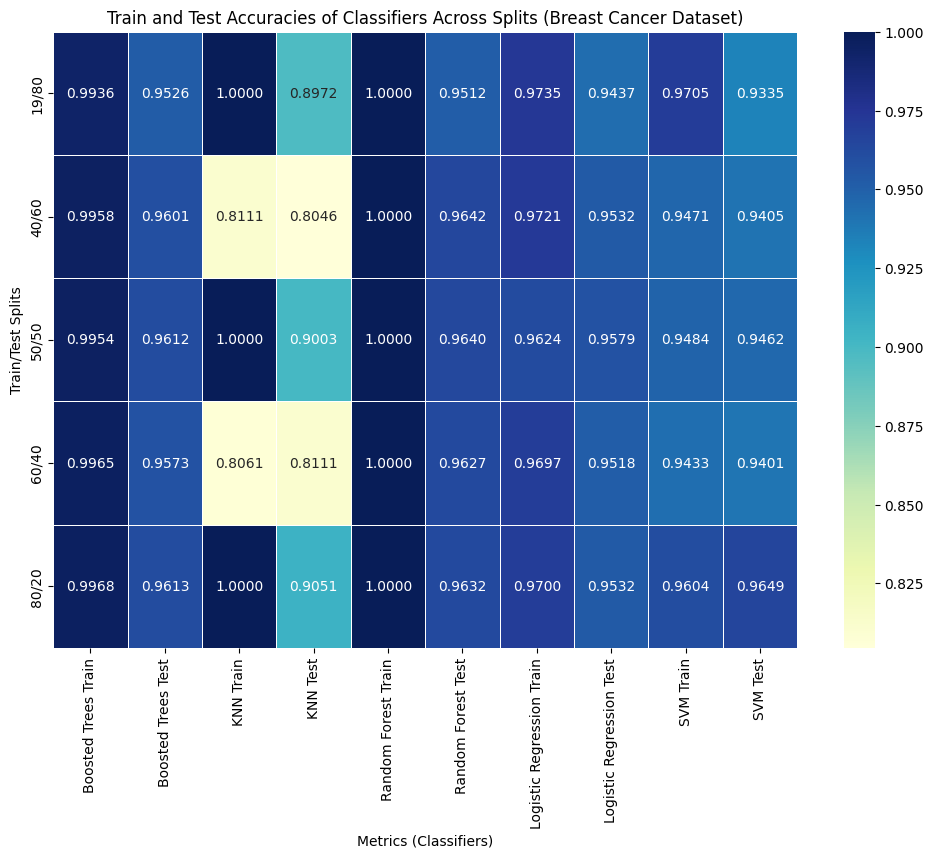

In [327]:
plt.figure(figsize=(12, 8))
sns.heatmap(cancer_classifiers_train_test_df, annot=True, cmap='YlGnBu', fmt=".4f", linewidths=0.5)
plt.title('Train and Test Accuracies of Classifiers Across Splits (Breast Cancer Dataset)')
plt.xlabel('Metrics (Classifiers)')
plt.ylabel('Train/Test Splits')
plt.show()


### Accuracy Curve

In [328]:
splits = [int(split.split('/')[1]) for split in cancer_classifiers_train_test_df.index]
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

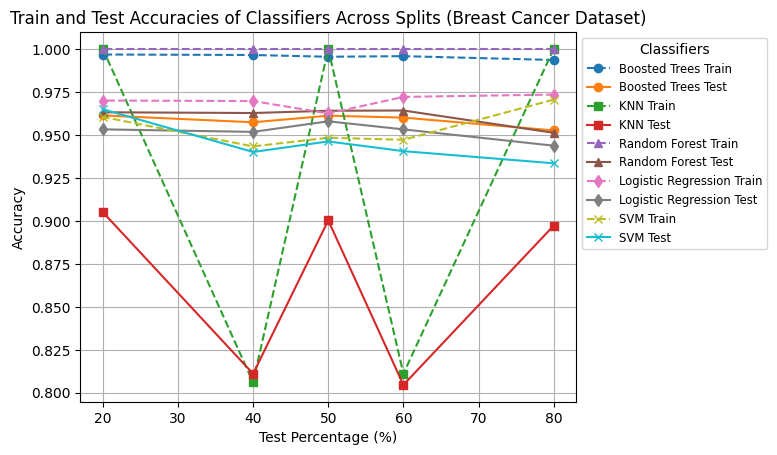

In [329]:
plt.plot(splits, cancer_classifiers_train_test_df['Boosted Trees Train'], label='Boosted Trees Train', marker='o', linestyle='--')
plt.plot(splits, cancer_classifiers_train_test_df['Boosted Trees Test'], label='Boosted Trees Test', marker='o')

plt.plot(splits, cancer_classifiers_train_test_df['KNN Train'], label='KNN Train', marker='s', linestyle='--')
plt.plot(splits, cancer_classifiers_train_test_df['KNN Test'], label='KNN Test', marker='s')

plt.plot(splits, cancer_classifiers_train_test_df['Random Forest Train'], label='Random Forest Train', marker='^', linestyle='--')
plt.plot(splits, cancer_classifiers_train_test_df['Random Forest Test'], label='Random Forest Test', marker='^')

plt.plot(splits, cancer_classifiers_train_test_df['Logistic Regression Train'], label='Logistic Regression Train', marker='d', linestyle='--')
plt.plot(splits, cancer_classifiers_train_test_df['Logistic Regression Test'], label='Logistic Regression Test', marker='d')

plt.plot(splits, cancer_classifiers_train_test_df['SVM Train'], label='SVM Train', marker='x', linestyle='--')
plt.plot(splits, cancer_classifiers_train_test_df['SVM Test'], label='SVM Test', marker='x')

plt.title('Train and Test Accuracies of Classifiers Across Splits (Breast Cancer Dataset)')
plt.xlabel('Test Percentage (%)')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', title="Classifiers")
plt.grid()
plt.show()